In [2]:
# libraries 
import os  
import numpy as np 
import seaborn as sns 
import cv2 
import tensorflow as tf  
import matplotlib.pyplot as plt 
import time 
from tqdm import tqdm  

from sklearn.metrics import classification_report, confusion_matrix 

# -------------------------------------------------- Training dataset ------------------------------------------------

In [39]:
labels = ['glioma','meningioma','notumor','pituitary']    

X_train = []
y_train = []
image_size = 299

for i in labels:
    folderPath = os.path.join('./DataSet_2','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('./DataSet_2','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 348.37it/s]


In [3]:
def visualize(history): 
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}' 
    
    # Plot training history
    plt.figure(figsize=(20, 8))
    plt.style.use('fivethirtyeight') 
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label='Training loss')
    plt.plot(Epochs, val_loss, 'g', label='Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.gca().set_ylim([0.0, 1.0])  # Set y-axis range from 0 to 100
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.gca().set_ylim([0.0, 1.0])  # Set y-axis range from 0 to 100
    plt.legend()

    plt.tight_layout()
    plt.show()

In [4]:
def visualize_2(history): 
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}' 
    
    # Plot training history
    plt.figure(figsize=(20, 8))
    plt.style.use('fivethirtyeight') 
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label='Training loss')
    plt.plot(Epochs, val_loss, 'g', label='Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [5]:
def visualize_3 (history): 
    import matplotlib.pyplot as plt
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1) 
    #plt.gca().set_ylim([0, 1.0])
    plt.plot(train_accuracy, label='Training Accuracy', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    # Plot validation accuracy
    plt.subplot(1, 2, 2) 
    #plt.gca().set_ylim([0, 1.0])
    plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    # Plot training and validation loss
    plt.figure(figsize=(20, 8))

    # Plot training loss
    plt.subplot(1, 2, 1) 
    #plt.gca().set_ylim([0, 1.0])
    plt.plot(train_loss, label='Training Loss', color='blue')
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.title('Training Loss')
    plt.legend()

    # Plot validation loss
    plt.subplot(1, 2, 2) 
    #plt.gca().set_ylim([0, 1.0])
    plt.plot(val_loss, label='Validation Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.title('Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ------------------------------------------- Training  ------------------------------------------ 

In [40]:
from sklearn.utils import shuffle 
X_train, y_train = shuffle(X_train,y_train, random_state=101) 

In [41]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=101) 

In [42]:
print(X_train.shape)  
print(X_test.shape )  
print(y_train.shape)  
print(y_test.shape )  

(2611, 299, 299, 3)
(653, 299, 299, 3)
(2611,)
(653,)


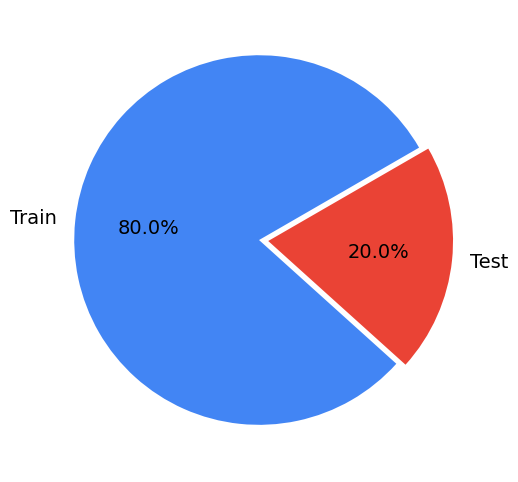

In [9]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(y_train), len(y_test)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

# Normalization

In [43]:
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0 

In [44]:
# Checking before using
print(f"Maximum and Minimum pixel value: {X_train_normalized.max()} - {X_train_normalized.min()}")  
print(f"Maximum and Minimum pixel value: {X_test_normalized.max()} - {X_test_normalized.min()}") 

Maximum and Minimum pixel value: 1.0 - 0.0
Maximum and Minimum pixel value: 1.0 - 0.0


# One-Hot encoding for labels

In [45]:
labels = ['glioma','meningioma','notumor','pituitary']    
label_to_index = {labels: index for index, labels in enumerate(labels)}
y_train_indices = np.array([label_to_index[labels] for labels in y_train])

# Convert indices to one-hot encoded vectors
y_train_one_encoded = tf.keras.utils.to_categorical(y_train_indices, num_classes=len(labels))

In [46]:
y_train_one_encoded.shape

(2611, 4)

In [47]:
labels = ['glioma','meningioma','notumor','pituitary']    
label_to_index = {labels: index for index, labels in enumerate(labels)}
y_test_indices = np.array([label_to_index[labels] for labels in y_test])

# Convert indices to one-hot encoded vectors
y_test_one_encoded = tf.keras.utils.to_categorical(y_test_indices, num_classes=len(labels))

In [48]:
y_test_one_encoded.shape

(653, 4)

In [49]:
print("x_train shape",X_train_normalized.shape)
print("x_test shape",X_test_normalized.shape)
print("y_train shape",y_train_one_encoded.shape)
print("y_test shape",y_test_one_encoded .shape)

x_train shape (2611, 299, 299, 3)
x_test shape (653, 299, 299, 3)
y_train shape (2611, 4)
y_test shape (653, 4)


# ------------------------------------------ Transfer Learning Models ----------------------------------------

##  ////////////////////////////////////////////////////////////  Xception  ////////////////////////////////////////////////////////

In [3]:
from tensorflow.keras.applications import Xception 

base_model_Xception = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3)) 

NUM_CLASSES = 4   
batch_size = 64
epochs = 50

# Freeze all layers in the base model 
for layer in base_model_Xception.layers:
    layer.trainable = False 
    
# add global average pooling layer
x = base_model_Xception.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x) 

# output layer
outputlayer_Xception = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)   

#creating new model
model_Xception = tf.keras.Model(inputs=base_model_Xception.input, outputs=outputlayer_Xception) 

# Compile model
model_Xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   

In [1]:
#model_Xception.summary()

In [89]:
starting_time = time.time()  

history_Xception = model_Xception.fit(X_train_normalized, y_train_one_encoded, epochs=epochs, verbose=1, validation_data=(X_test_normalized, y_test_one_encoded), shuffle=False, batch_size=batch_size)  
 
ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Seconds") 

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.5860 - loss: 0.9483 - val_accuracy: 0.7948 - val_loss: 0.5556
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.8388 - loss: 0.4409 - val_accuracy: 0.8392 - val_loss: 0.4254
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.8846 - loss: 0.3219 - val_accuracy: 0.8576 - val_loss: 0.3854
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9099 - loss: 0.2537 - val_accuracy: 0.8668 - val_loss: 0.3561
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9344 - loss: 0.2021 - val_accuracy: 0.8836 - val_loss: 0.3382
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9479 - loss: 0.1619 - val_accuracy: 0.8851 - val_loss: 0.3396
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9569 - loss: 0.1352 - val_accuracy: 0.8622 - val_loss: 0.3958
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.9559 - loss: 0.1269 - val_accuracy: 0.8254 - val_loss:

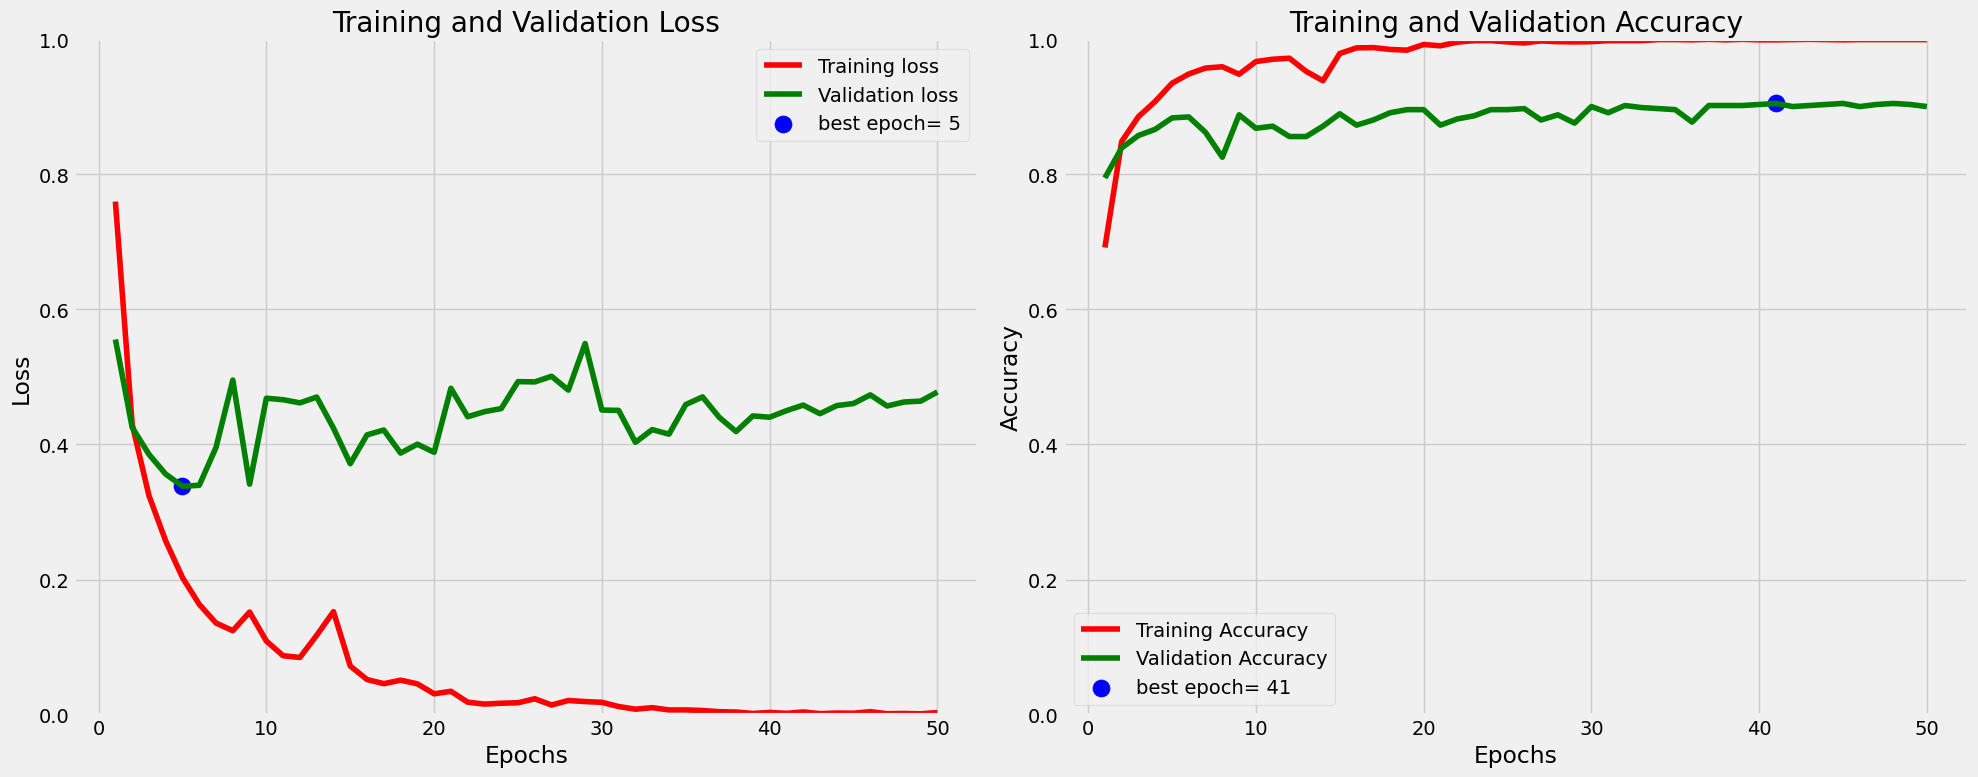

In [127]:
# Visualize first time
visualize(history_Xception)

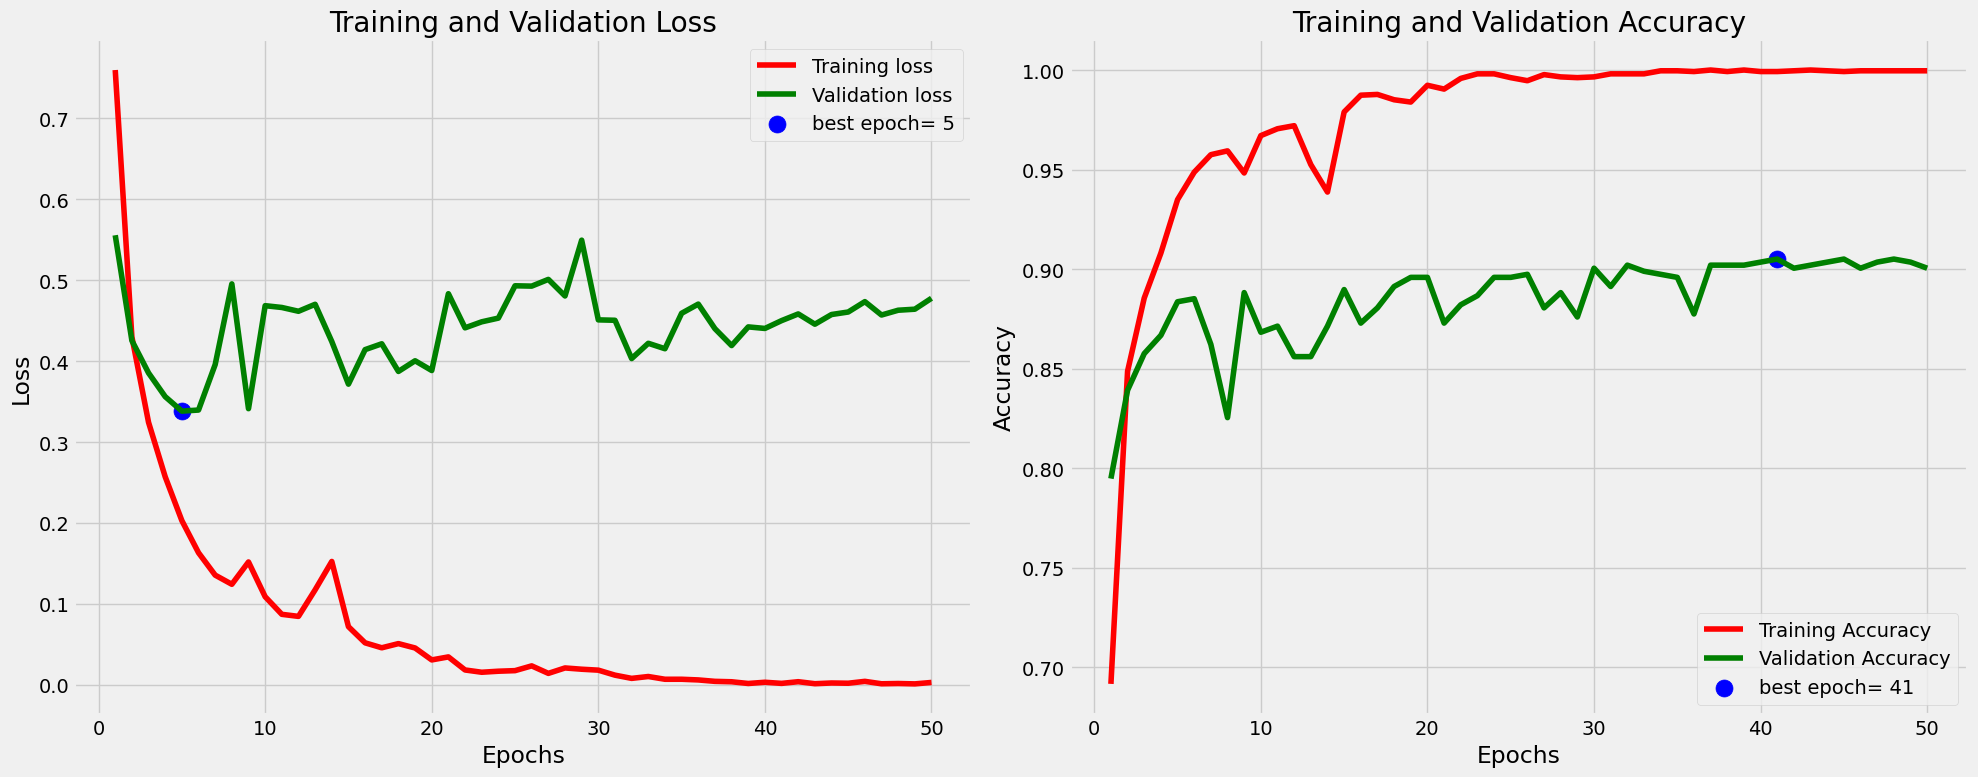

In [129]:
# Visualize first time
visualize_2(history_Xception)

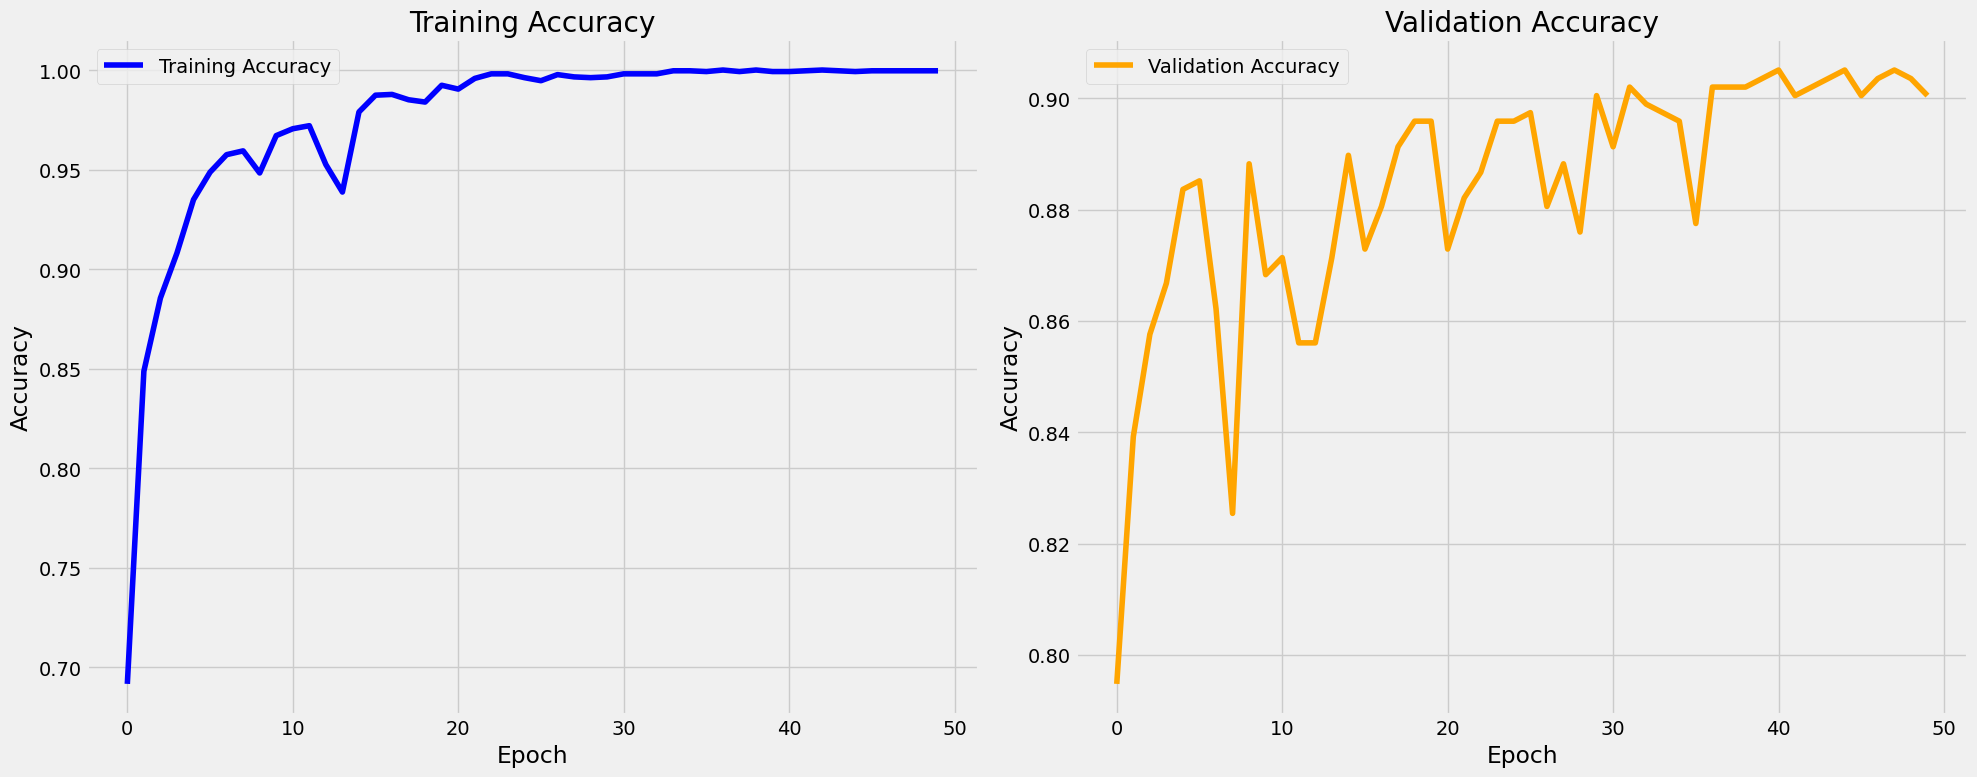

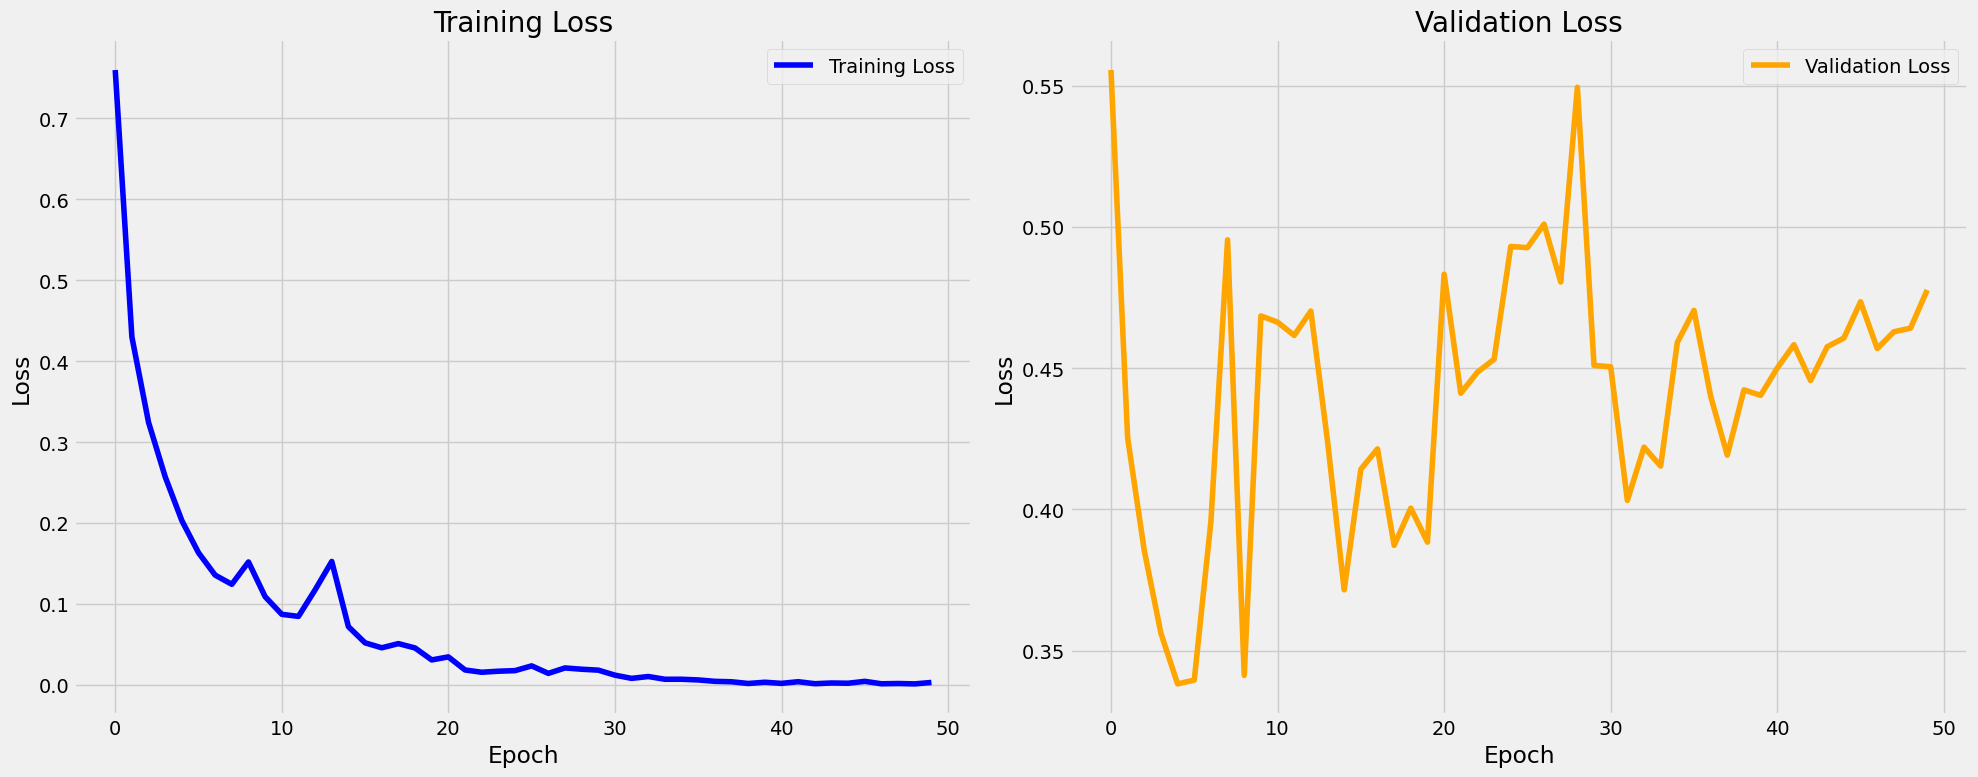

In [131]:
# Visualize first time
visualize_3(history_Xception)

# ------------------------------------------- Evaluate Xception model ----------------------------------------------

In [124]:
# Evaluation
test_loss, test_acc = model_Xception.evaluate(X_test_normalized, y_test_one_encoded)  # X_test_normalized, y_test_one_encoded
print("Test Accuracy: {:.2f}%".format(test_acc * 100))
print("Test Loss: {:.2f}%".format(test_loss * 100))

21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 868ms/step - accuracy: 0.9153 - loss: 0.4225
Test Accuracy: 90.05%
Test Loss: 47.98%


In [125]:
# prediction
y_pred = model_Xception.predict(X_test_normalized)  # X_test_normalized
y_pred = np.argmax(y_pred,axis=1) 

21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 880ms/step


In [132]:
y_test_new = np.argmax(y_test_one_encoded,axis=1)  # y_test_one_encoded

## Classification Report
0 - Glioma
1 - meningioma
2 - No tumor
3 - Pituitary 

In [133]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       168
           1       0.89      0.86      0.88       200
           2       0.95      0.89      0.92       109
           3       0.94      0.95      0.95       176

    accuracy                           0.90       653
   macro avg       0.91      0.90      0.90       653
weighted avg       0.90      0.90      0.90       653



## Confusion Matrix

In [134]:
confusion_matrix(y_test_new, y_pred)

array([[150,  13,   4,   1],
       [ 18, 173,   0,   9],
       [  8,   3,  97,   1],
       [  2,   5,   1, 168]], dtype=int64)

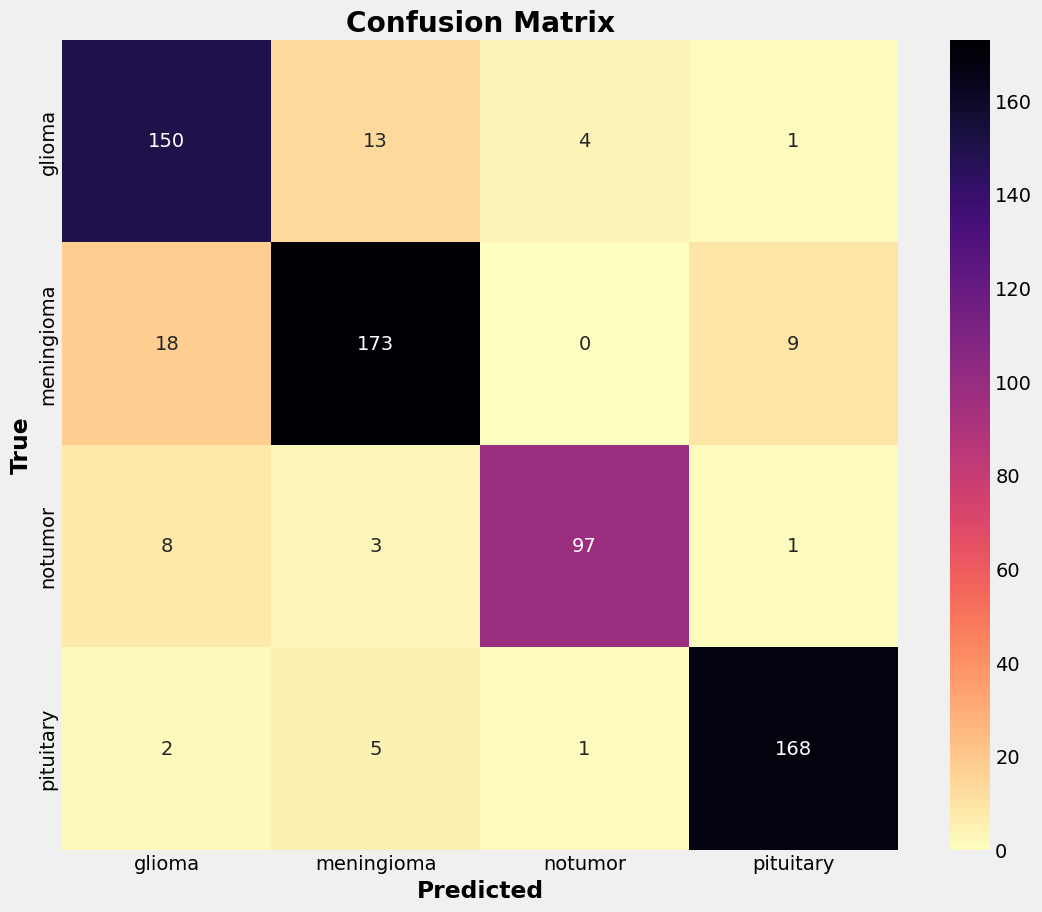

In [135]:
conf_matrix = confusion_matrix(y_test_new,y_pred) # x=y_test_new, y=y_pred

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('True', fontweight='bold')
plt.title('Confusion Matrix', fontweight='bold')
plt.show() 

# Model Save

In [136]:
# saving the model 
from keras.saving import save_model
save_model(model_Xception, 'saved_model_Xception_lastone.keras') 

In [50]:
# Loading model 
from keras.models import load_model 
model_modelXception = load_model('saved_model_Xception_lastone.keras')

c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 318 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


# Feature Extractor

In [51]:
from keras.models import Model 
second_last_layer_output = model_modelXception.layers[-2].output

feature_extractor_1 = Model(inputs=model_modelXception.input, outputs=second_last_layer_output)  

# feature_extractor_1.summary()

In [52]:
extracted_feature_Xception = feature_extractor_1.predict(X_train_normalized)

82/82 ━━━━━━━━━━━━━━━━━━━━ 70s 846ms/step


In [53]:
extracted_feature_Xception.shape

(2611, 1024)

In [54]:
extracted_feature_Xception_T = feature_extractor_1.predict(X_test_normalized)

21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 832ms/step


In [55]:
extracted_feature_Xception_T.shape

(653, 1024)

##  ////////////////////////////////////////////////////////  InceptionV3  ////////////////////////////////////////////////////////////

In [6]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model

# Main model 
# include_top=False means that do not add dense layers at the top because we add them.
base_model_InceptionV3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

NUM_CLASSES = 4   
batch_size = 64
epochs = 50

# Freeze the layers in the base model
for layer in base_model_InceptionV3.layers:
    layer.trainable = False

# add global average pooling layer
x = base_model_InceptionV3.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x) 

# output layer
outputlayer_Inceptionv3 = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)   

# Create the final model
model_InceptionV3 = Model(inputs=base_model_InceptionV3.input, outputs=outputlayer_Inceptionv3)

# Compile the model
model_InceptionV3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

In [2]:
#model_InceptionV3.summary()

In [144]:
# calculating time 
starting_time = time.time() 

history_InceptionV3 = model_InceptionV3.fit(X_train_normalized, y_train_one_encoded, epochs=epochs, verbose=1, validation_data=(X_test_normalized, y_test_one_encoded), shuffle=False, batch_size=batch_size)  

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "min/Seconds") 

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.5143 - loss: 1.6768 - val_accuracy: 0.7289 - val_loss: 0.6878
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8058 - loss: 0.5393 - val_accuracy: 0.7795 - val_loss: 0.5425
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8361 - loss: 0.4313 - val_accuracy: 0.8070 - val_loss: 0.4743
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8669 - loss: 0.3598 - val_accuracy: 0.8285 - val_loss: 0.4287
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8834 - loss: 0.3085 - val_accuracy: 0.8377 - val_loss: 0.4076
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9006 - loss: 0.2659 - val_accuracy: 0.8484 - val_loss: 0.3907
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9185 - loss: 0.2322 - val_accuracy: 0.8530 - val_loss: 0.3850
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9287 - loss: 0.2028 - val_accuracy: 0.8545 - val_loss:

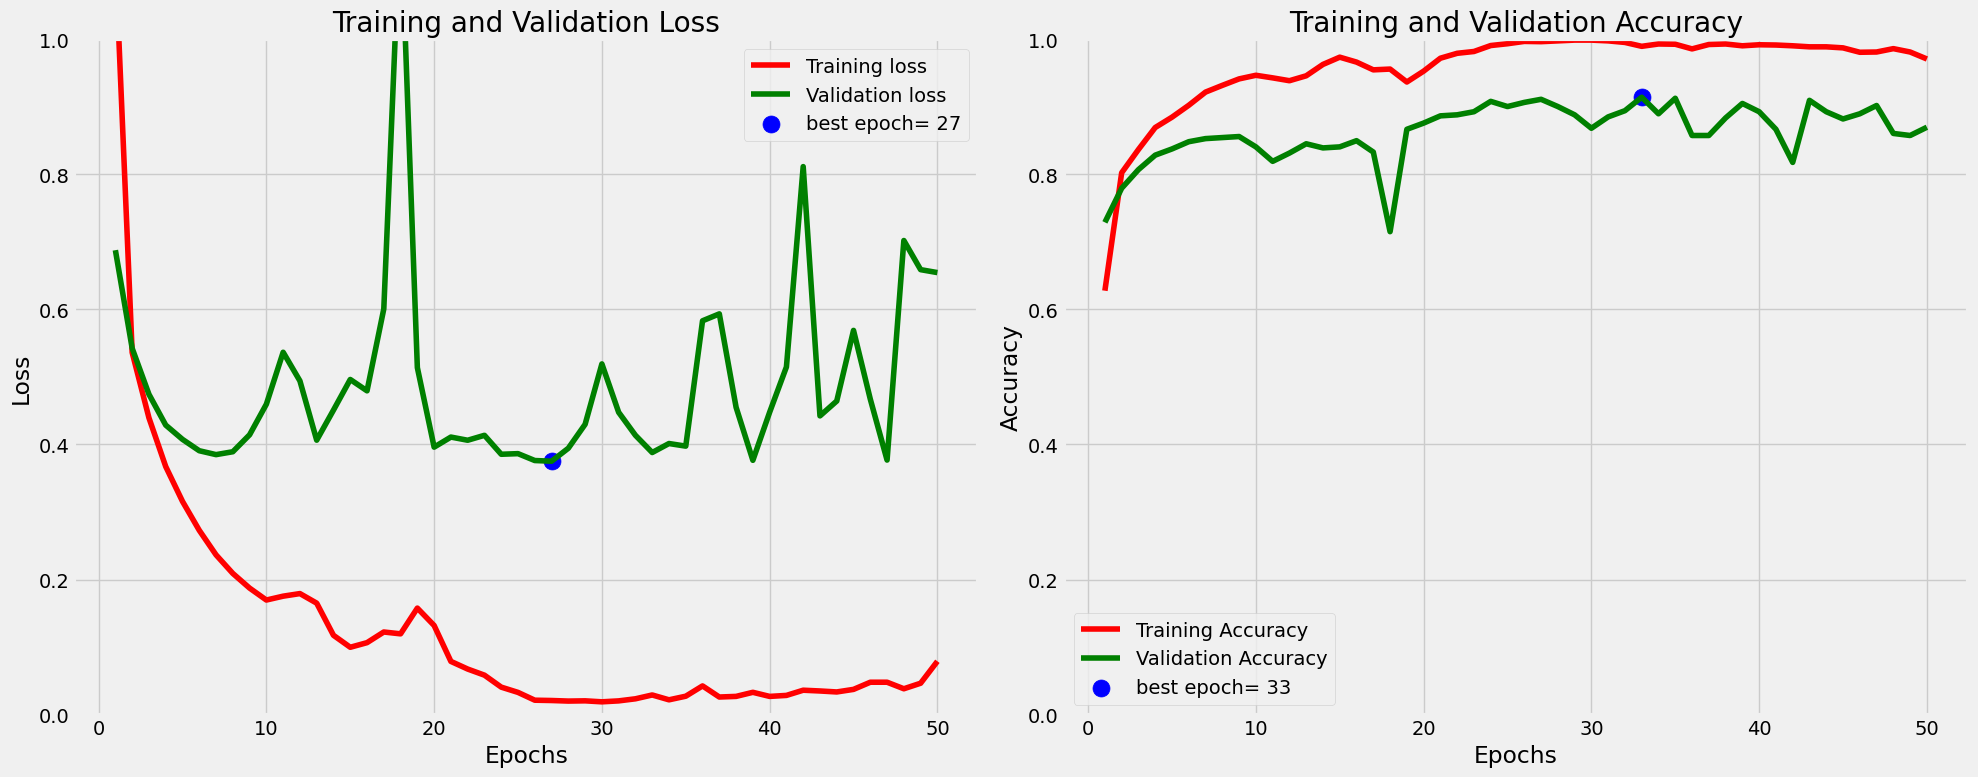

In [145]:
visualize(history_InceptionV3)

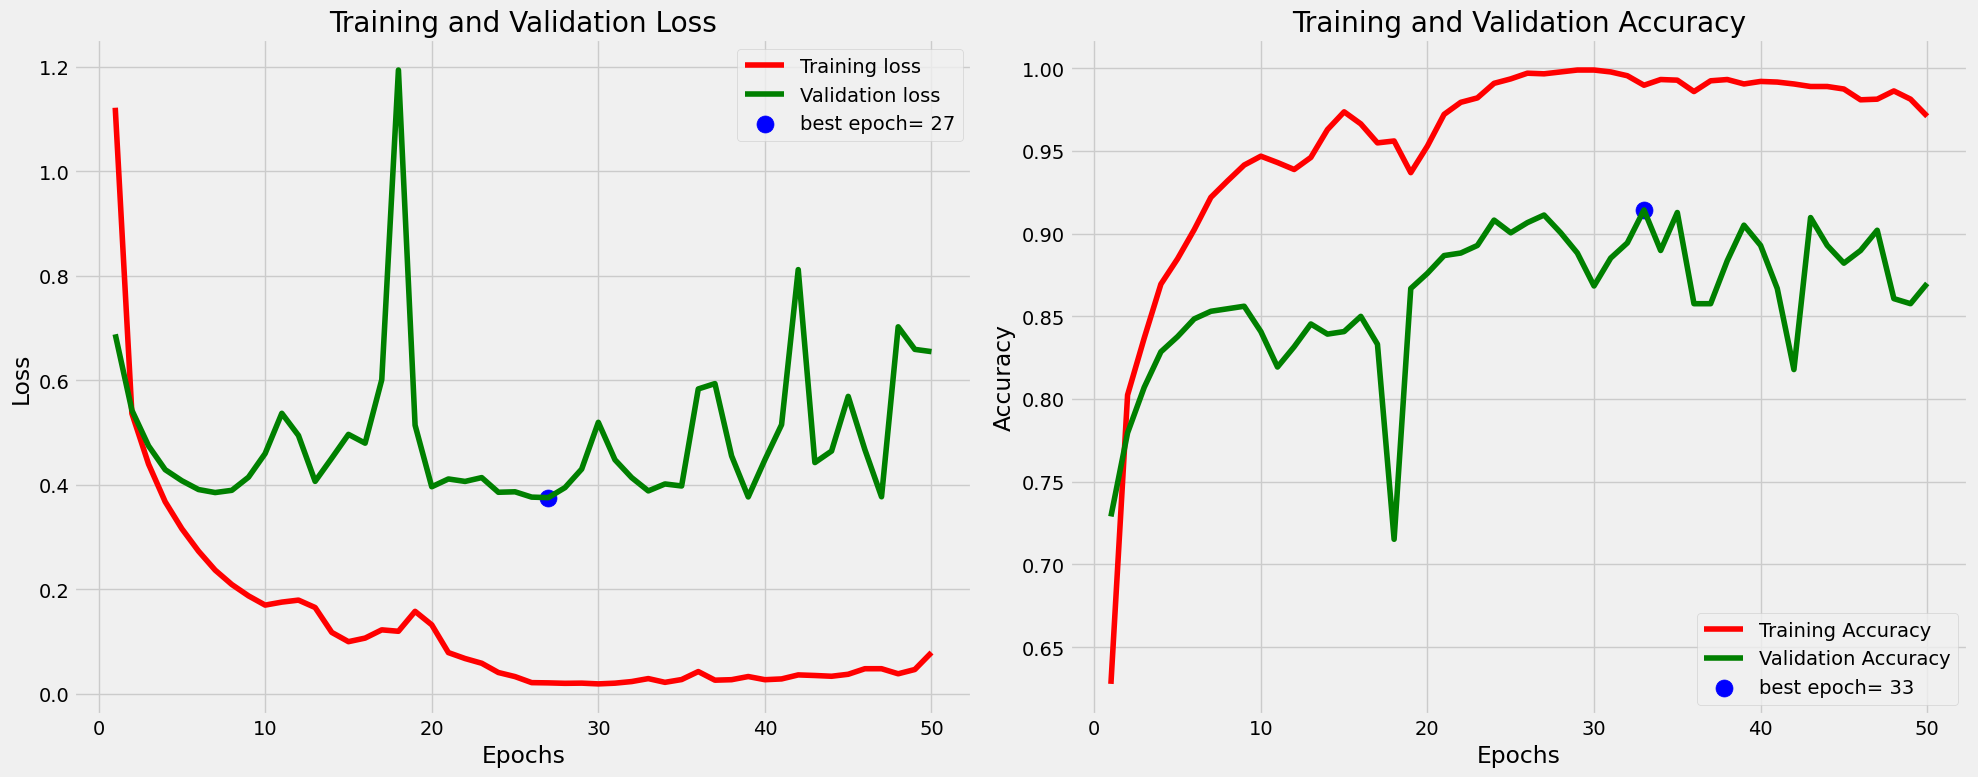

In [146]:
visualize_2(history_InceptionV3)

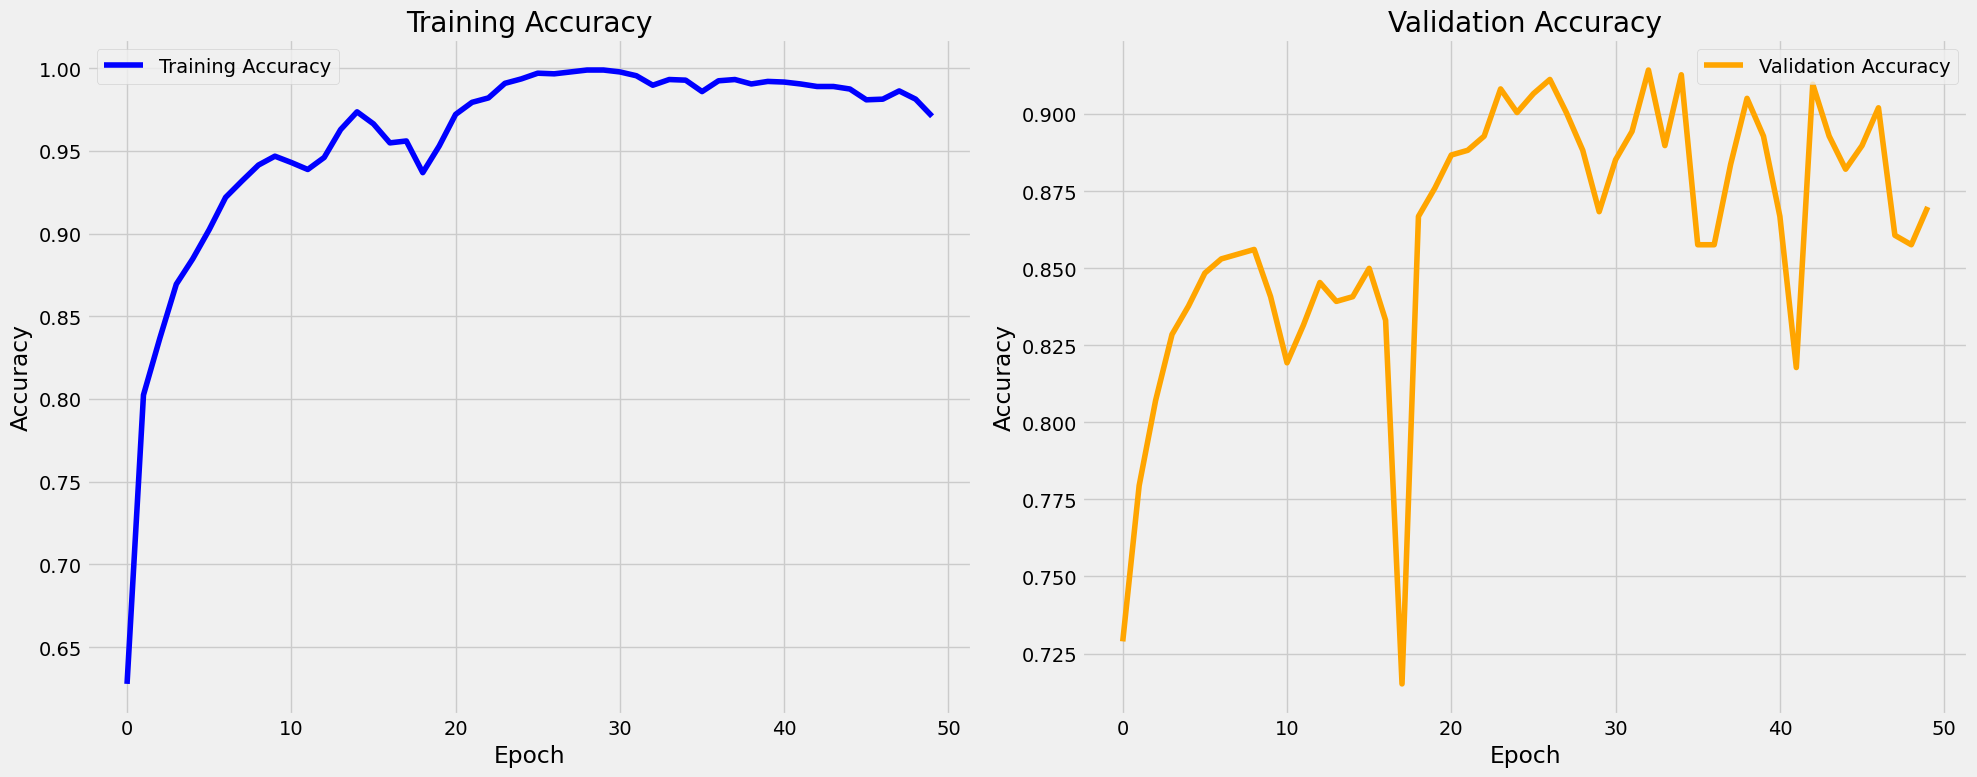

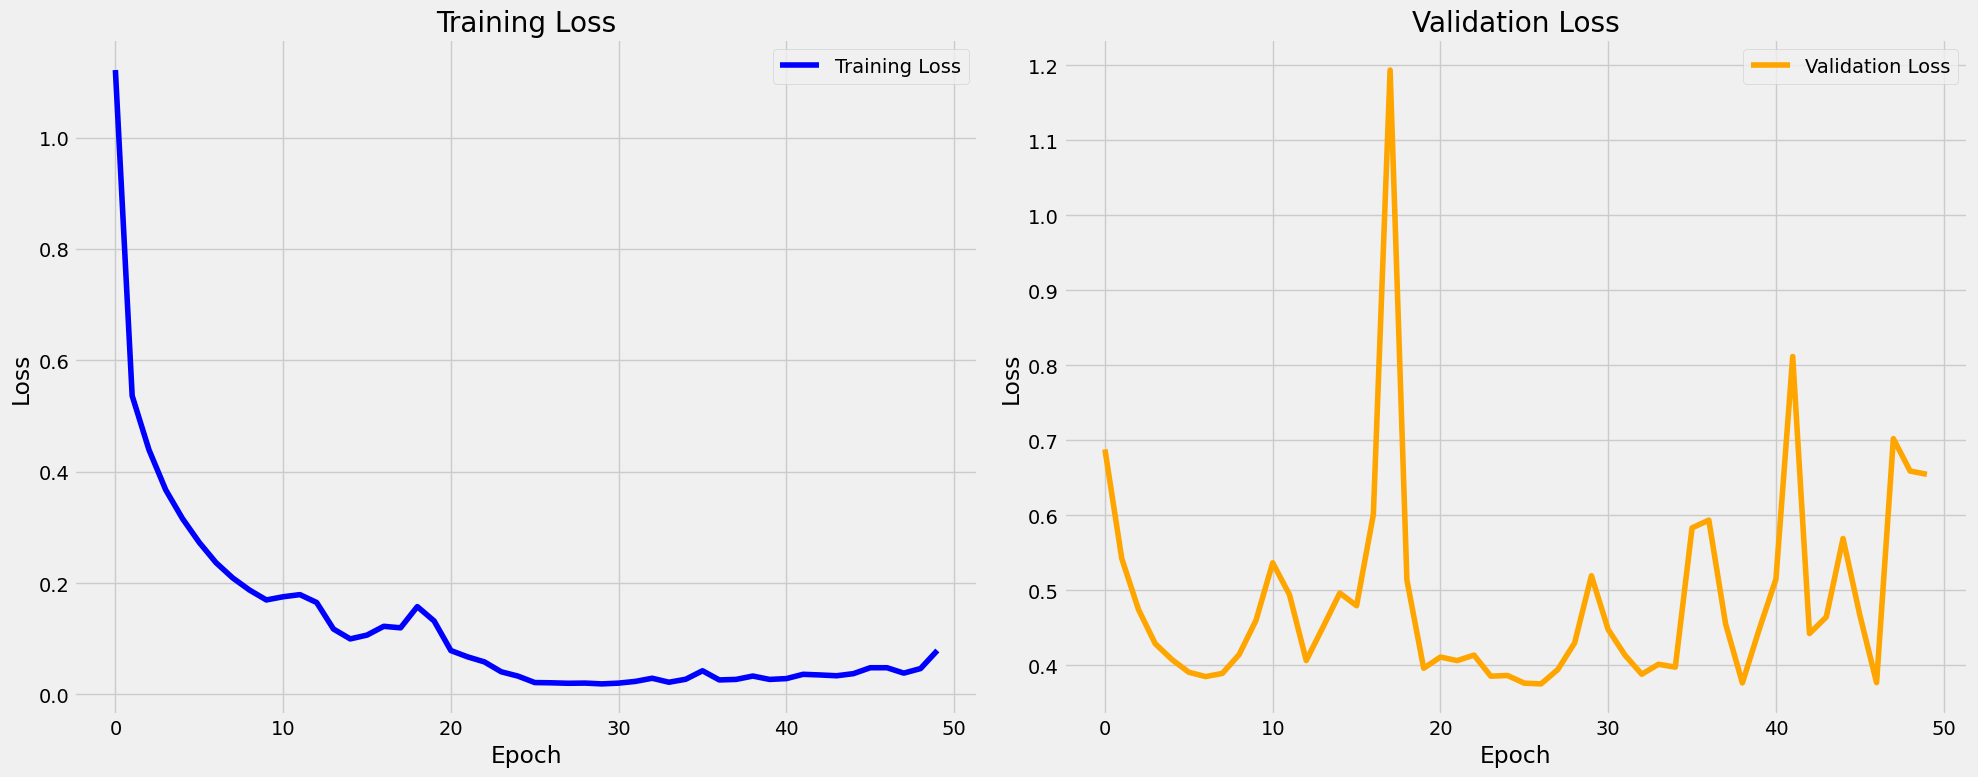

In [147]:
visualize_3(history_InceptionV3)

# --------------------------------------------- Evaluate InceptionV3 ------------------------------------------------

In [148]:
test_loss, test_acc = model_InceptionV3.evaluate(X_test_normalized, y_test_one_encoded)
print("Test Accuracy: {:.2f}%".format(test_acc * 100)) 
print("Test Loss: {:.2f}%".format(test_loss * 100))

21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 419ms/step - accuracy: 0.8616 - loss: 0.6911
Test Accuracy: 86.98%
Test Loss: 66.81%


## Prediction

In [149]:
y_pred = model_InceptionV3.predict(X_test_normalized)
y_pred = np.argmax(y_pred,axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 474ms/step


In [150]:
y_test_new = np.argmax(y_test_one_encoded,axis=1)

## Classification Report
0 - Glioma
1 - meningioma
2 - No tumor
3 - Pituitary 

In [151]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.81       168
           1       0.76      0.93      0.83       200
           2       0.95      0.89      0.92       109
           3       0.90      0.97      0.93       176

    accuracy                           0.87       653
   macro avg       0.90      0.87      0.87       653
weighted avg       0.89      0.87      0.87       653



## Confusion Matrix

In [152]:
confusion_matrix(y_test_new, y_pred)

array([[115,  45,   4,   4],
       [  2, 186,   0,  12],
       [  0,  10,  97,   2],
       [  0,   5,   1, 170]], dtype=int64)

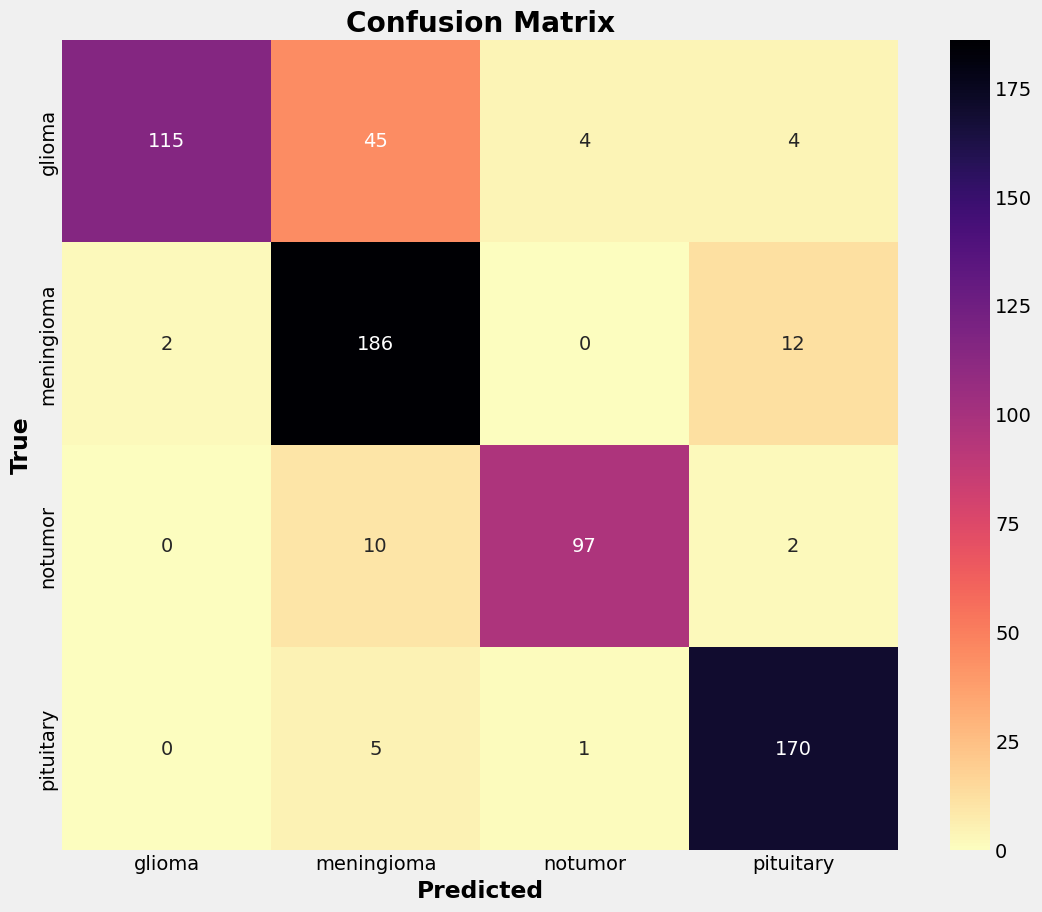

In [153]:
conf_matrix = confusion_matrix(y_test_new,y_pred) # x=y_test_new, y=y_pred

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('True', fontweight='bold')
plt.title('Confusion Matrix', fontweight='bold')
plt.show() 

# Saving Model

In [154]:
# saving the model 
from keras.saving import save_model
save_model(model_InceptionV3, 'saved_model_InceptionV3_lastone.keras') 

In [56]:
# Loading model 
from keras.models import load_model 
model_modelInceptionV3 = load_model('saved_model_InceptionV3_lastone.keras')

In [57]:
from keras.models import Model 
second_last_layer_output = model_modelInceptionV3.layers[-2].output

feature_extractor_2 = Model(inputs=model_modelInceptionV3.input, outputs=second_last_layer_output)  

# feature_extractor_2.summary()

In [58]:
extracted_feature_InceptionV3 = feature_extractor_2.predict(X_train_normalized)

82/82 ━━━━━━━━━━━━━━━━━━━━ 34s 396ms/step


In [59]:
extracted_feature_InceptionV3.shape

(2611, 1024)

In [60]:
extracted_feature_InceptionV3_T = feature_extractor_2.predict(X_test_normalized)

21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 384ms/step


In [61]:
extracted_feature_InceptionV3_T.shape

(653, 1024)

##  /////////////////////////////////////////////////  DenseNet121  ////////////////////////////////////////////////////

# Resizing images for 224,224 image sizes

In [18]:
print("x_train shape",X_train_normalized.shape)
print("x_test shape",X_test_normalized.shape)
print("y_train shape",y_train_one_encoded.shape)
print("y_test shape",y_test_one_encoded .shape)

x_train shape (2611, 224, 224, 3)
x_test shape (653, 224, 224, 3)
y_train shape (2611, 4)
y_test shape (653, 4)


In [1]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define base model
base_model_DenseNet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

NUM_CLASSES = 4
batch_size = 64 
epochs = 50

# Freeze the layers of the base model
for layer in base_model_DenseNet121.layers:
    layer.trainable = False  

# Add global average pooling layer
x = base_model_DenseNet121.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  

# Output layer
output_layer_DenseNet121 = Dense(NUM_CLASSES, activation='softmax')(x)  

# Combine model
model_DenseNet121 = Model(inputs=base_model_DenseNet121.input, outputs=output_layer_DenseNet121)

# Compile the model
model_DenseNet121.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
#model_DenseNet121.summary()

In [22]:
# calculating time 
starting_time = time.time() 

history_DenseNet121 = model_DenseNet121.fit(X_train_normalized, y_train_one_encoded, epochs=epochs, verbose=1, validation_data=(X_test_normalized, y_test_one_encoded), shuffle=False, batch_size=batch_size)  

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "min/Seconds") 

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 980ms/step - accuracy: 0.5313 - loss: 1.3901 - val_accuracy: 0.7397 - val_loss: 0.6622
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 962ms/step - accuracy: 0.7907 - loss: 0.5496 - val_accuracy: 0.8392 - val_loss: 0.4790
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 941ms/step - accuracy: 0.8444 - loss: 0.4312 - val_accuracy: 0.8423 - val_loss: 0.4402
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 952ms/step - accuracy: 0.8858 - loss: 0.3420 - val_accuracy: 0.8469 - val_loss: 0.4188
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 959ms/step - accuracy: 0.9083 - loss: 0.2845 - val_accuracy: 0.8545 - val_loss: 0.3887
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 962ms/step - accuracy: 0.9234 - loss: 0.2395 - val_accuracy: 0.8729 - val_loss: 0.3634
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 971ms/step - accuracy: 0.9371 - loss: 0.2032 - val_accuracy: 0.8806 - val_loss: 0.3508
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 965ms/step - accuracy: 0.9496 - loss: 0.1722 - val_accu

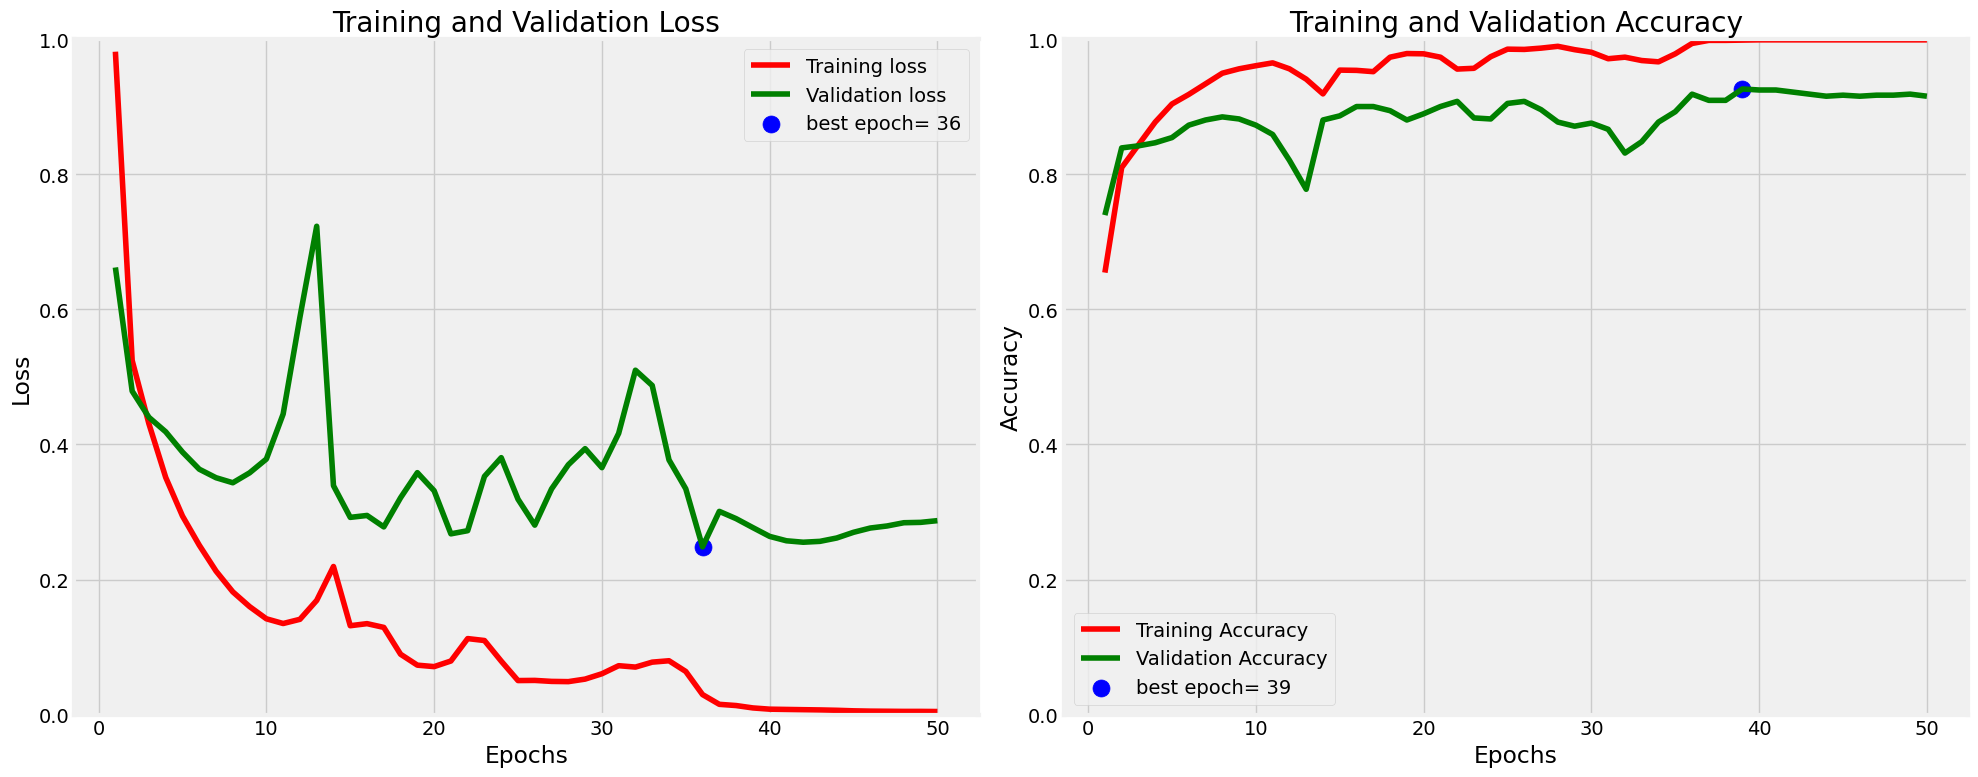

In [23]:
visualize(history_DenseNet121)

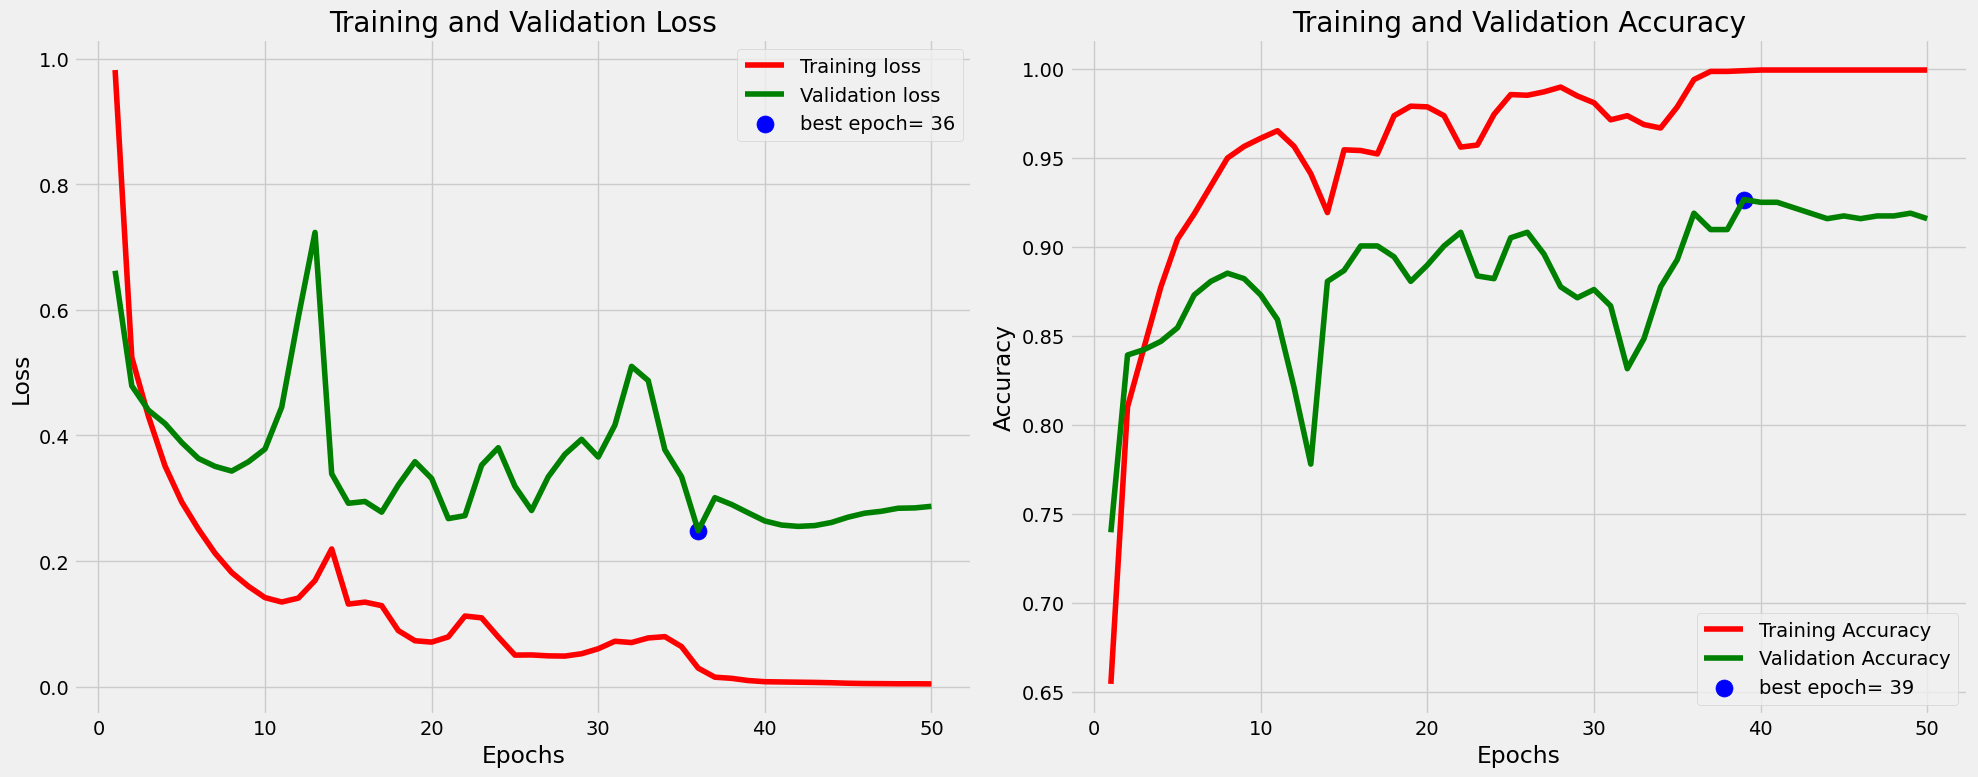

In [24]:
visualize_2(history_DenseNet121)

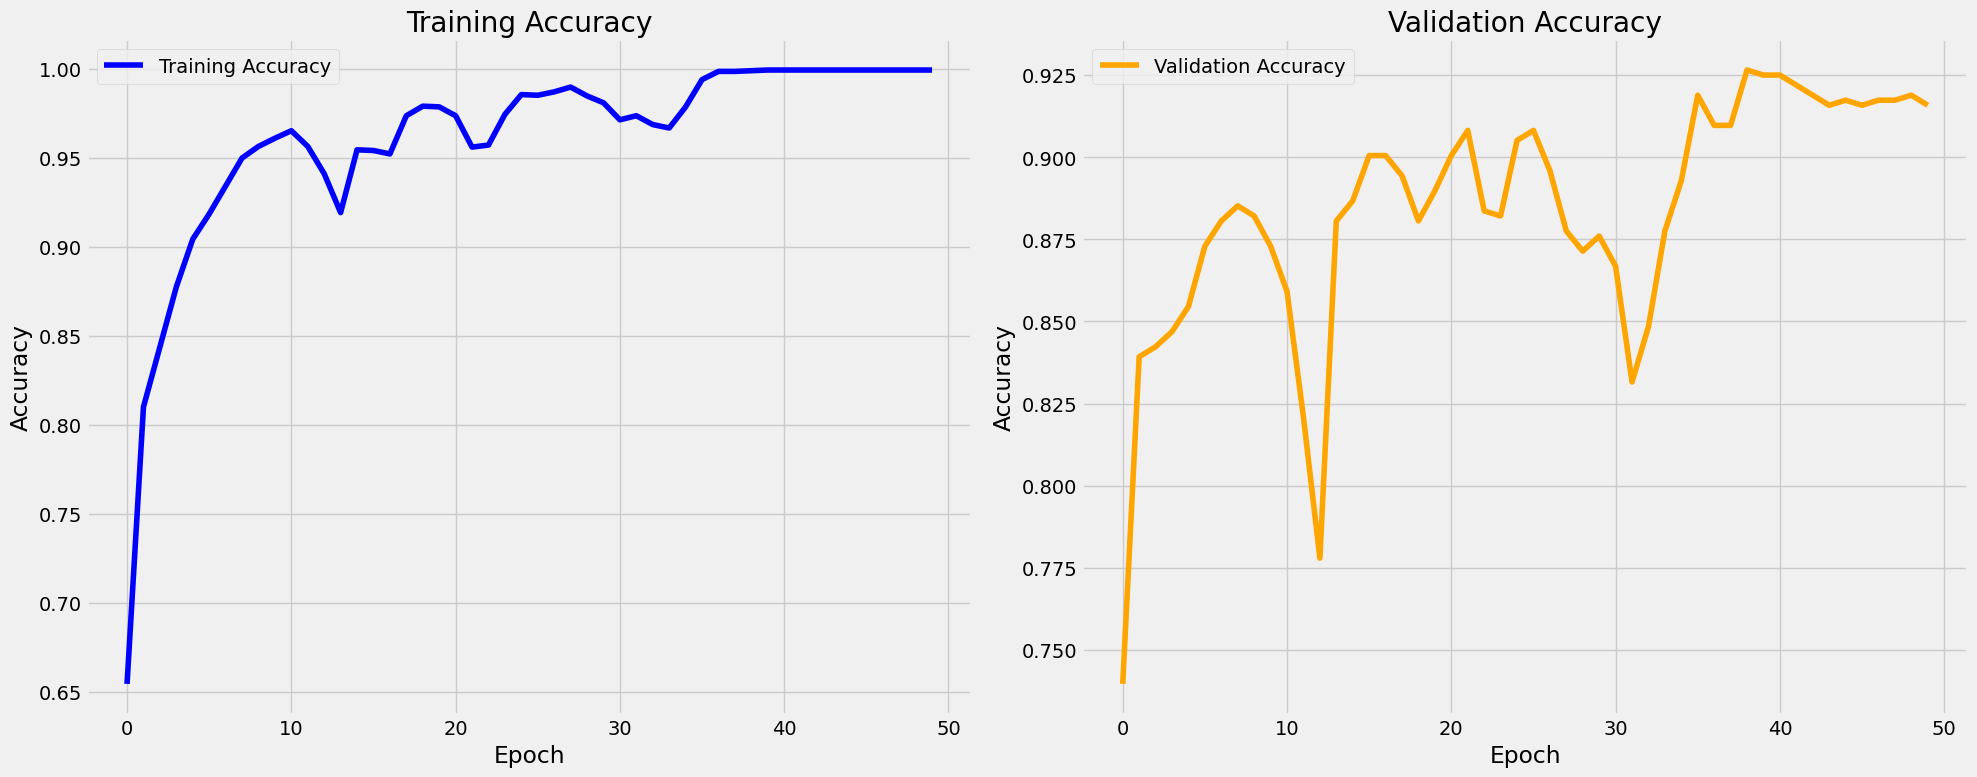

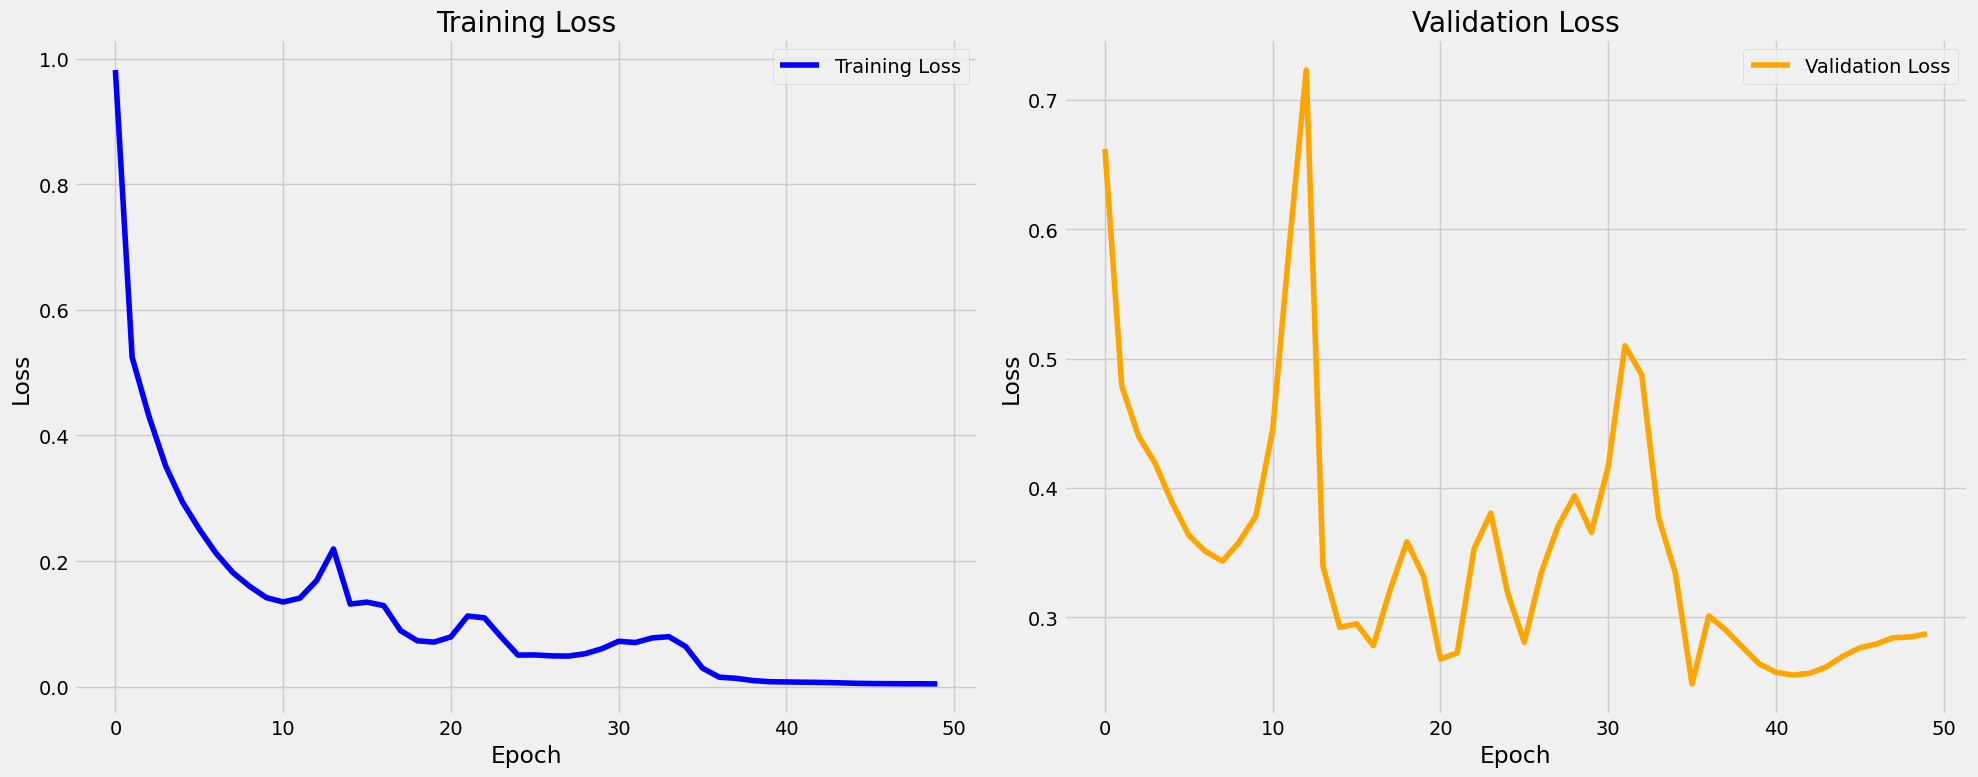

In [25]:
visualize_3(history_DenseNet121)

In [26]:
test_loss, test_acc = model_DenseNet121.evaluate(X_test_normalized, y_test_one_encoded)
print("Test Accuracy: {:.2f}%".format(test_acc * 100)) 
print("Test Loss: {:.2f}%".format(test_loss * 100))

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 336ms/step - accuracy: 0.9227 - loss: 0.2762
Test Accuracy: 91.58%
Test Loss: 29.15%


In [27]:
y_pred = model_DenseNet121.predict(X_test_normalized)
y_pred = np.argmax(y_pred,axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 421ms/step


In [28]:
y_test_new = np.argmax(y_test_one_encoded,axis=1)

In [29]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.90       168
           1       0.88      0.91      0.90       200
           2       0.95      0.88      0.91       109
           3       0.92      0.98      0.95       176

    accuracy                           0.92       653
   macro avg       0.92      0.91      0.92       653
weighted avg       0.92      0.92      0.92       653



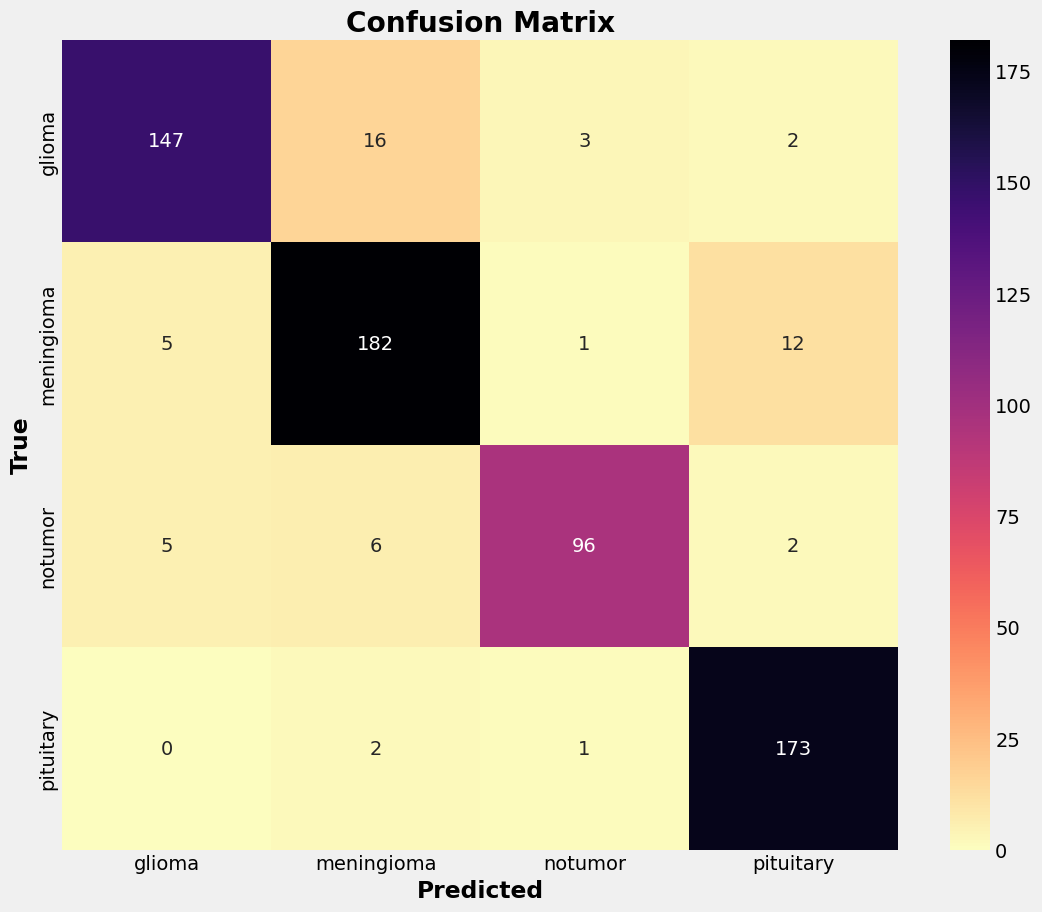

In [30]:
conf_matrix = confusion_matrix(y_test_new,y_pred) # x=y_test_new, y=y_pred

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma_r', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('True', fontweight='bold')
plt.title('Confusion Matrix', fontweight='bold')
plt.show() 

In [31]:
# saving the model 
from keras.saving import save_model
save_model(model_DenseNet121, 'saved_model_DenseNet121_lastone.keras')  

In [32]:
# Loading model 
from keras.models import load_model 
model_modelDenseNet121 = load_model('saved_model_DenseNet121_lastone.keras')

c:\Users\Talha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 734 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [33]:
from keras.models import Model 
second_last_layer_output = model_modelDenseNet121.layers[-2].output

feature_extractor_3 = Model(inputs=model_modelDenseNet121.input, outputs=second_last_layer_output)  

# feature_extractor_3.summary()

In [34]:
extracted_feature_DenseNet121 = feature_extractor_3.predict(X_train_normalized)

82/82 ━━━━━━━━━━━━━━━━━━━━ 33s 381ms/step


In [35]:
extracted_feature_DenseNet121.shape

(2611, 1024)

In [36]:
extracted_feature_DenseNet121_T = feature_extractor_3.predict(X_test_normalized)

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 326ms/step


In [37]:
extracted_feature_DenseNet121_T.shape

(653, 1024)

## Feature Process

In [62]:
## X_train
print(extracted_feature_Xception.shape) 
print(extracted_feature_InceptionV3.shape) 
print(extracted_feature_DenseNet121.shape) 
print('///////////////////////////////////')
#X_test 
print(extracted_feature_Xception_T.shape) 
print(extracted_feature_InceptionV3_T.shape) 
print(extracted_feature_DenseNet121_T.shape) 

(2611, 1024)
(2611, 1024)
(2611, 1024)
///////////////////////////////////
(653, 1024)
(653, 1024)
(653, 1024)


In [63]:
concatenated_features_Training = np.concatenate((extracted_feature_Xception, 
                                        extracted_feature_InceptionV3, 
                                        extracted_feature_DenseNet121), axis=1)

# Check the shape of the concatenated features 
concatenated_features_Testing = np.concatenate((extracted_feature_Xception_T, 
                                        extracted_feature_InceptionV3_T, 
                                        extracted_feature_DenseNet121_T), axis=1)

print("Features Shape for training:", concatenated_features_Training.shape) 
print("Features Shape for testing:", concatenated_features_Testing.shape) 

Features Shape for training: (2611, 3072)
Features Shape for testing: (653, 3072)


## ML Classifiers

In [64]:
#ML classifiers
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

In [65]:
print(concatenated_features_Training.shape) # X_train 
print(y_train.shape) 
# convert to 2-D aray 
print(concatenated_features_Testing.shape) 
print(y_test.shape)

(2611, 3072)
(2611,)
(653, 3072)
(653,)


## RF --------------------------------------------------------------

In [66]:
starting_time = time.time()   

random_forest_classifier = RandomForestClassifier(n_estimators=100000, max_depth=100000)  
random_forest_classifier.fit(concatenated_features_Training, y_train)

# Evaluate Random Forest classifier
accuracy_RF = random_forest_classifier.score(concatenated_features_Testing, y_test)
print("Accuracy of RF:", accuracy_RF)   

ending_time = time.time()   

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of RF: 0.9234303215926493
Total runtime of model: 36.57044824361801 Min.


In [67]:
# Predict the labels for the test set
y_pred_RF = random_forest_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_test, y_pred_RF)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.90      0.89      0.89       168
  meningioma       0.90      0.92      0.91       200
     notumor       0.95      0.91      0.93       109
   pituitary       0.95      0.98      0.96       176

    accuracy                           0.92       653
   macro avg       0.93      0.92      0.92       653
weighted avg       0.92      0.92      0.92       653



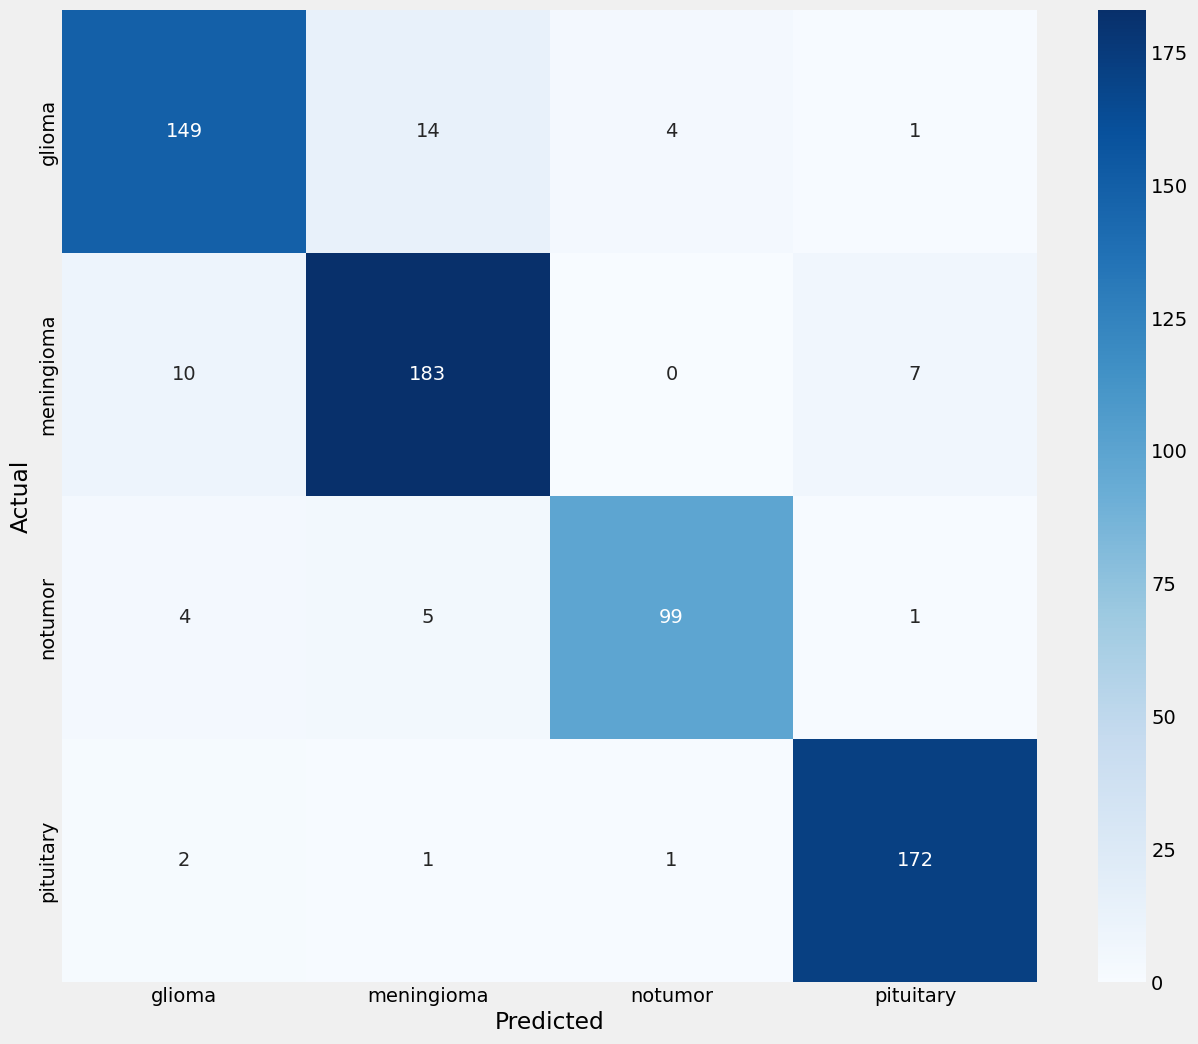

In [68]:
# Plotting the confusion matrix as a heatmap 
cm = confusion_matrix(y_test, y_pred_RF) 

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## LR ---------------------------------------------------------------------

In [69]:
# Before feature selection
starting_time = time.time()   

logistic_regression_classifier = LogisticRegression(multi_class="multinomial")  
logistic_regression_classifier.fit(concatenated_features_Training, y_train)   

#Evaluate LR classifier
accuracy_LR = logistic_regression_classifier.score(concatenated_features_Testing, y_test)
print("Accuracy of LR:", accuracy_LR)  

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of LR: 0.9295558958652373
Total runtime of model: 0.002164045969645182 Min.


In [70]:
# Predict the labels for the test set
y_pred_LR = logistic_regression_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_test, y_pred_LR)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.93      0.90      0.92       168
  meningioma       0.91      0.91      0.91       200
     notumor       0.96      0.91      0.93       109
   pituitary       0.93      0.99      0.96       176

    accuracy                           0.93       653
   macro avg       0.93      0.93      0.93       653
weighted avg       0.93      0.93      0.93       653



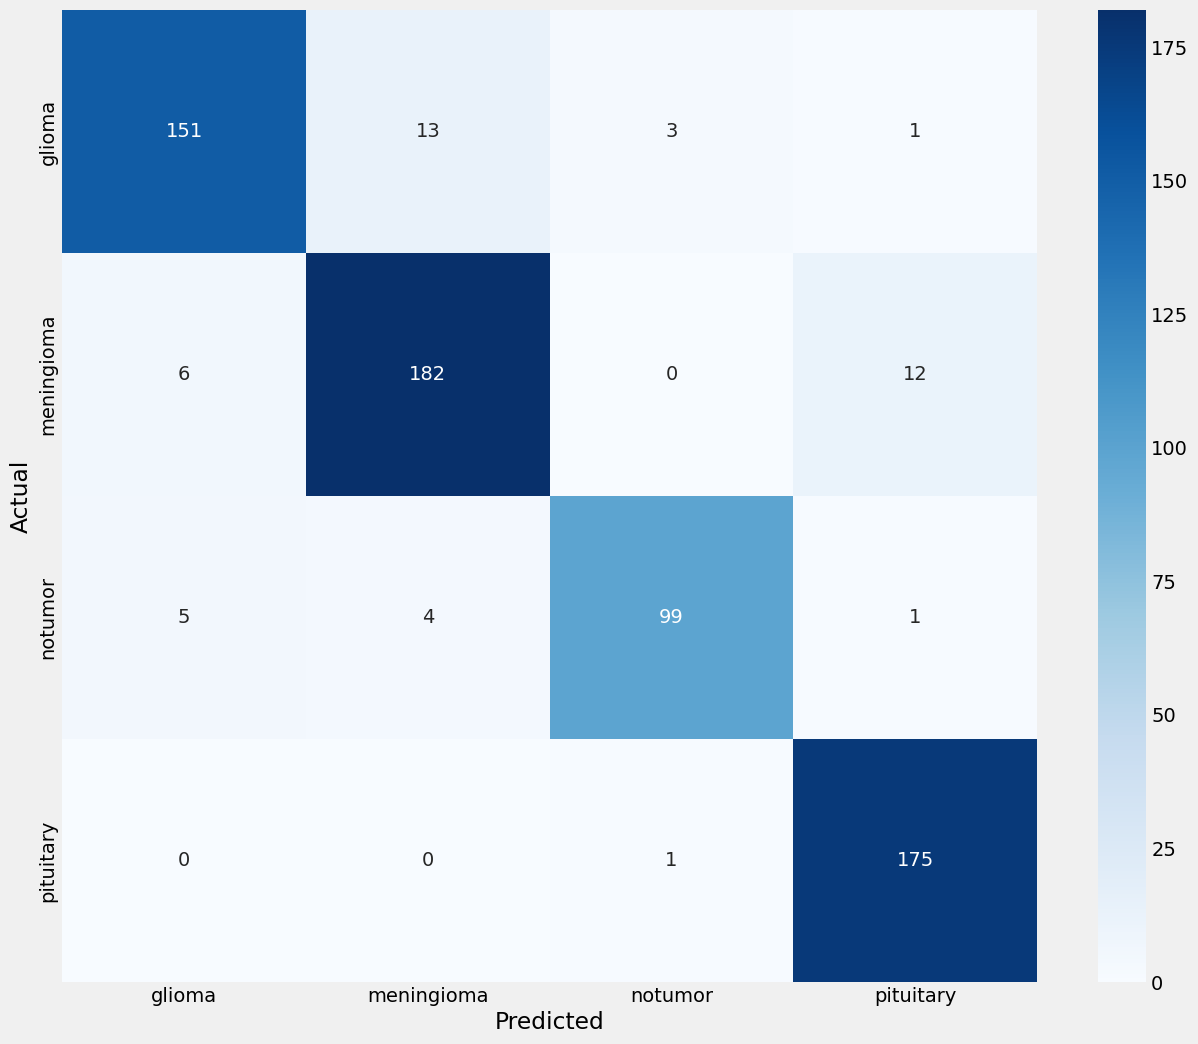

In [71]:
# Plotting the confusion matrix as a heatmap 
cm = confusion_matrix(y_test, y_pred_LR) 

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## KNN -------------------------------------------------------------

In [72]:
starting_time = time.time()   

knn_classifier = KNeighborsClassifier(n_neighbors=4)  
knn_classifier.fit(concatenated_features_Training, y_train)

# Evaluate KNN classifier
accuracy_KNN = knn_classifier.score(concatenated_features_Testing, y_test)
print("Accuracy of KNN:", accuracy_KNN) 

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of KNN: 0.9234303215926493
Total runtime of model: 0.005967330932617187 Min.


In [73]:
# Predict the labels for the test set
y_pred_KNN = knn_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_test, y_pred_KNN)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.94      0.89      0.91       168
  meningioma       0.88      0.93      0.90       200
     notumor       0.96      0.86      0.91       109
   pituitary       0.94      0.99      0.97       176

    accuracy                           0.92       653
   macro avg       0.93      0.92      0.92       653
weighted avg       0.92      0.92      0.92       653



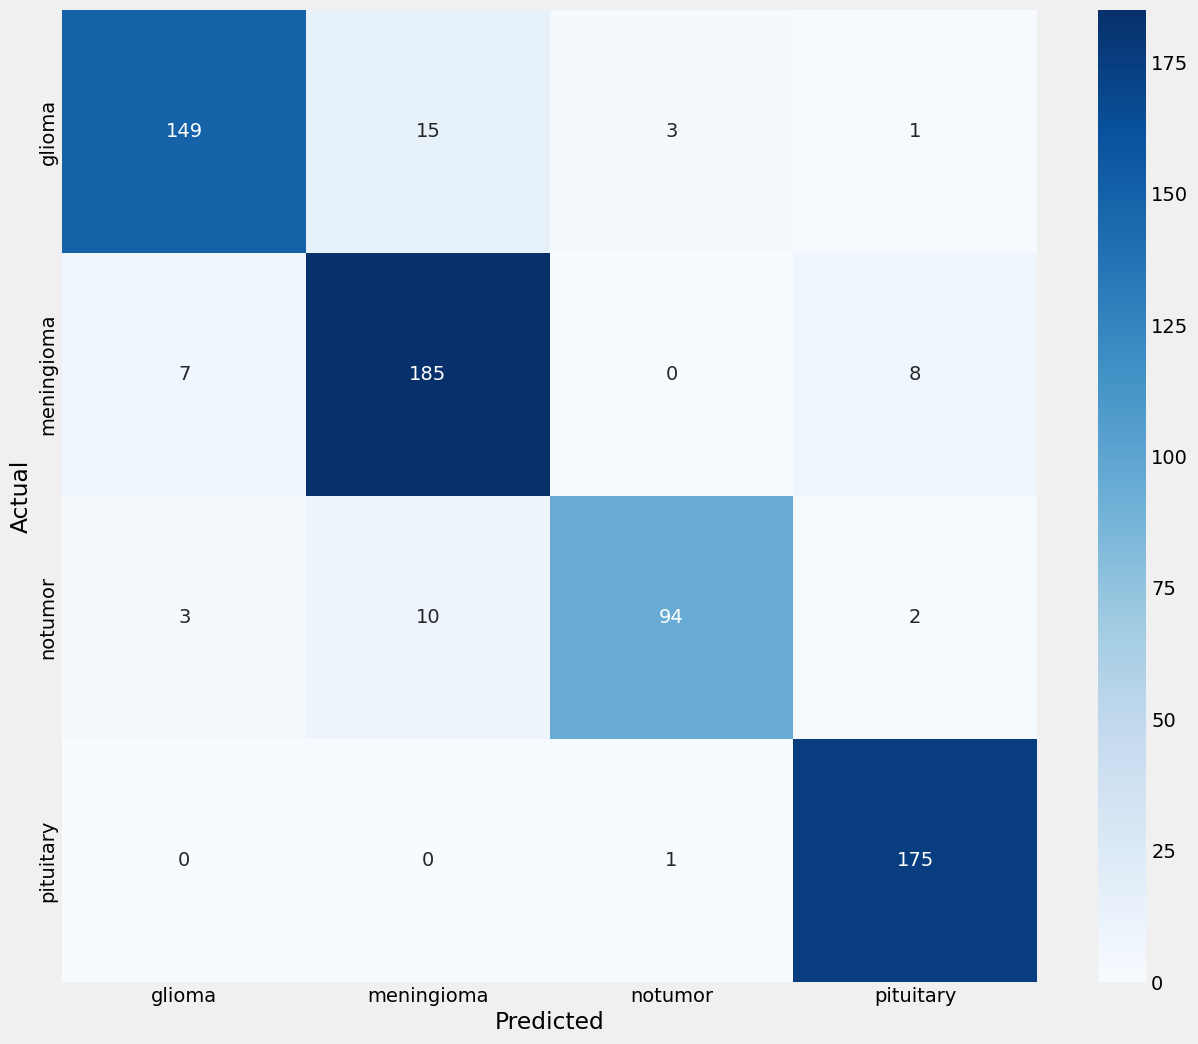

In [74]:
# Plotting the confusion matrix as a heatmap 
cm = confusion_matrix(y_test, y_pred_KNN) 

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM -------------------------------------------------------------

In [75]:
starting_time = time.time()  
# Train SVM classifier
svm_classifier = SVC(kernel='linear') # should I use different kernel ??? such as linear, sigmoid, and radial basis
svm_classifier.fit(concatenated_features_Training, y_train)

# Evaluate SVM classifier
accuracy_Linear = svm_classifier.score(concatenated_features_Testing, y_test)
print("Accuracy of Linear:", accuracy_Linear)   

ending_time = time.time()  
  
total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of Linear: 0.9295558958652373
Total runtime of model: 0.007438111305236817 Min.


In [76]:
# Predict the labels for the test set
y_pred_SVM_L = svm_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_test, y_pred_SVM_L)

# Print the classification report
print("Classification Report for SVM_Linear:")
print(report)

Classification Report for SVM_Linear:
              precision    recall  f1-score   support

      glioma       0.93      0.89      0.91       168
  meningioma       0.91      0.92      0.91       200
     notumor       0.96      0.92      0.94       109
   pituitary       0.94      0.99      0.96       176

    accuracy                           0.93       653
   macro avg       0.93      0.93      0.93       653
weighted avg       0.93      0.93      0.93       653



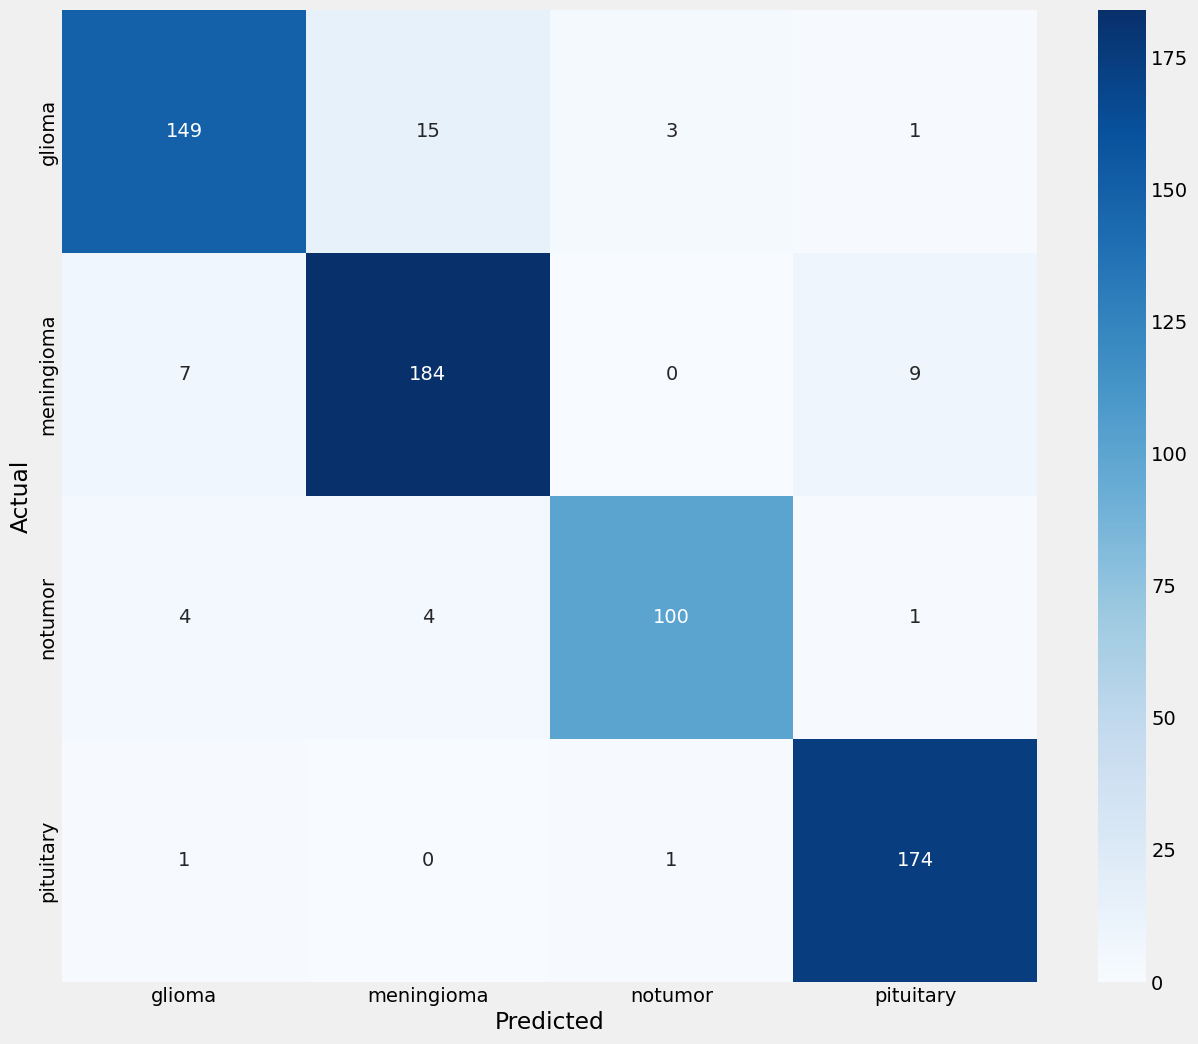

In [77]:
# Plotting the confusion matrix as a heatmap 
cm = confusion_matrix(y_test, y_pred_SVM_L) 

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM -------------------------------------------------------------

In [78]:
starting_time = time.time()   
# Train SVM classifier
svm_classifier = SVC(kernel='rbf') 
svm_classifier.fit(concatenated_features_Training, y_train)

# Evaluate SVM classifier
accuracy_Rbf= svm_classifier.score(concatenated_features_Testing, y_test)
print("Accuracy of Rbf:", accuracy_Rbf)   

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min") 

Accuracy of Rbf: 0.9341500765696784
Total runtime of model: 0.017489794890085855 Min


In [79]:
# Predict the labels for the test set
y_pred_SVM_R = svm_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_test, y_pred_SVM_R)

# Print the classification report
print("Classification Report for SVM_Linear:")
print(report)

Classification Report for SVM_Linear:
              precision    recall  f1-score   support

      glioma       0.94      0.89      0.91       168
  meningioma       0.91      0.93      0.92       200
     notumor       0.96      0.92      0.94       109
   pituitary       0.94      0.99      0.96       176

    accuracy                           0.93       653
   macro avg       0.94      0.93      0.93       653
weighted avg       0.93      0.93      0.93       653



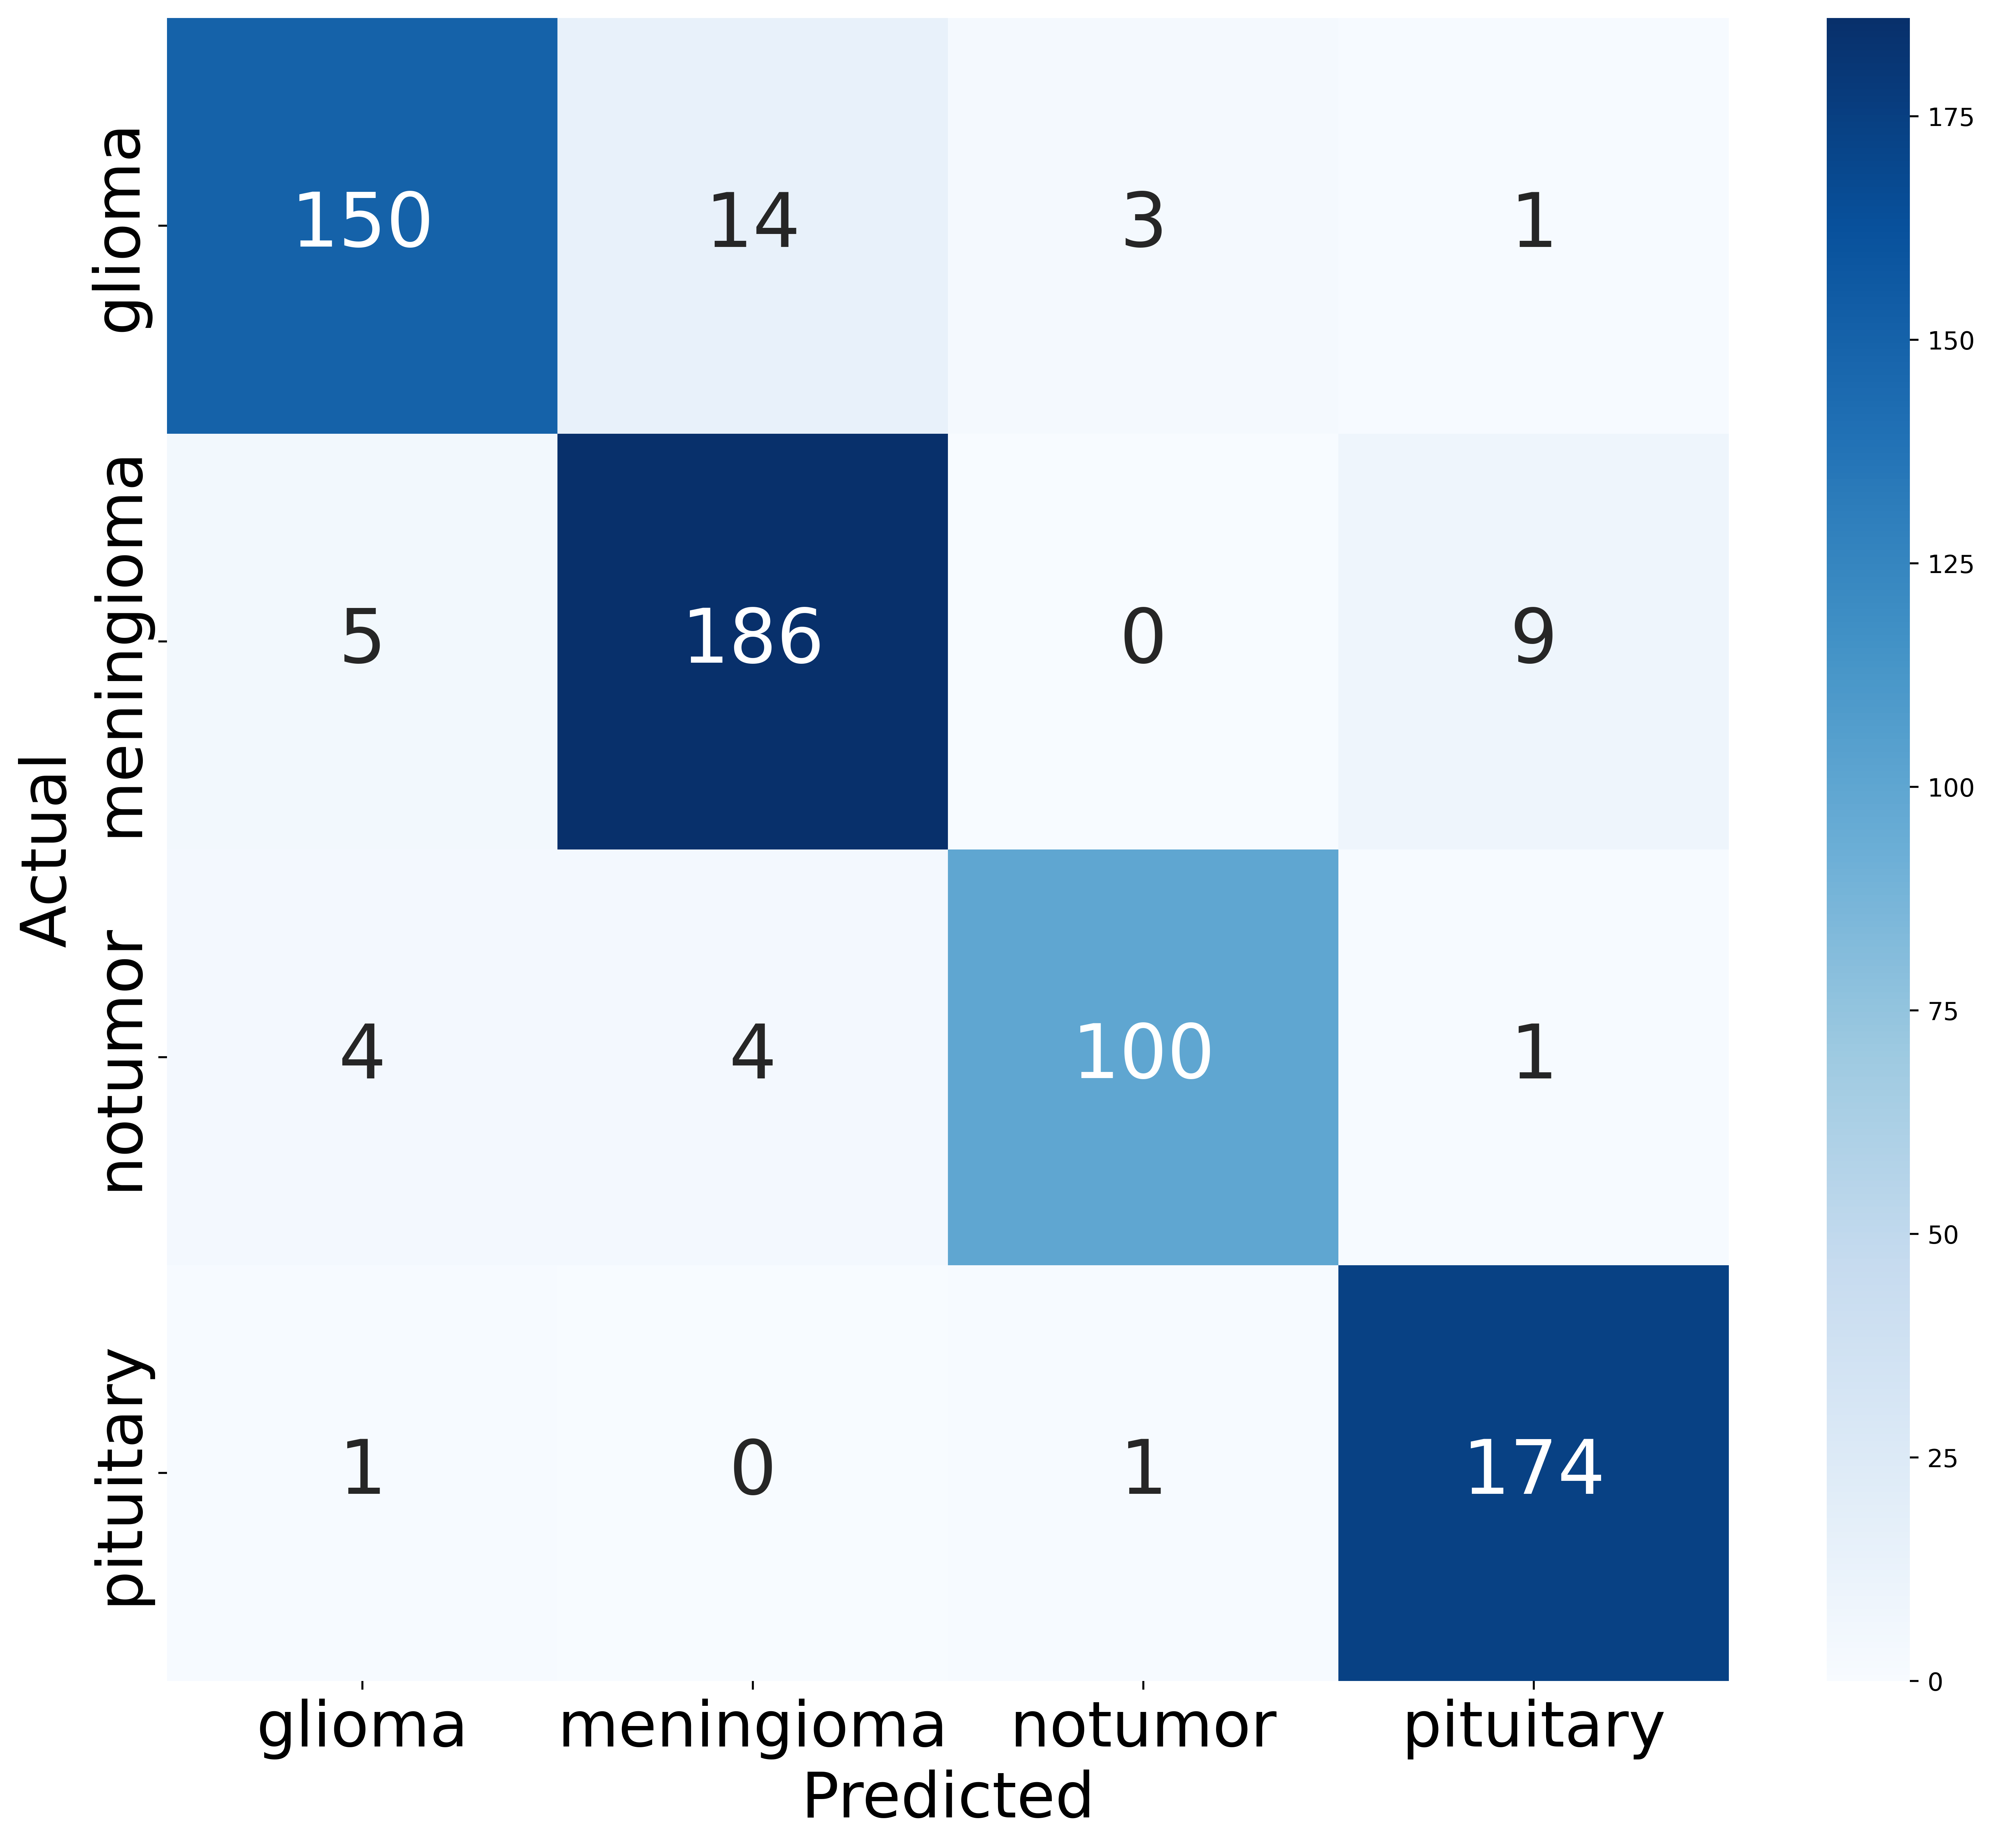

In [1]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[150 , 14, 3,  1],
                              [ 5, 186, 0, 9],
                              [ 4, 4, 100, 1],
                              [  1, 0, 1, 174]])

# Plot confusion matrix
plt.figure(figsize=(14, 12), dpi=500)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 30})

# Increase label font size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25) 
plt.xlabel('Predicted', fontsize = 25)
plt.ylabel('Actual', fontsize = 25)
plt.show()

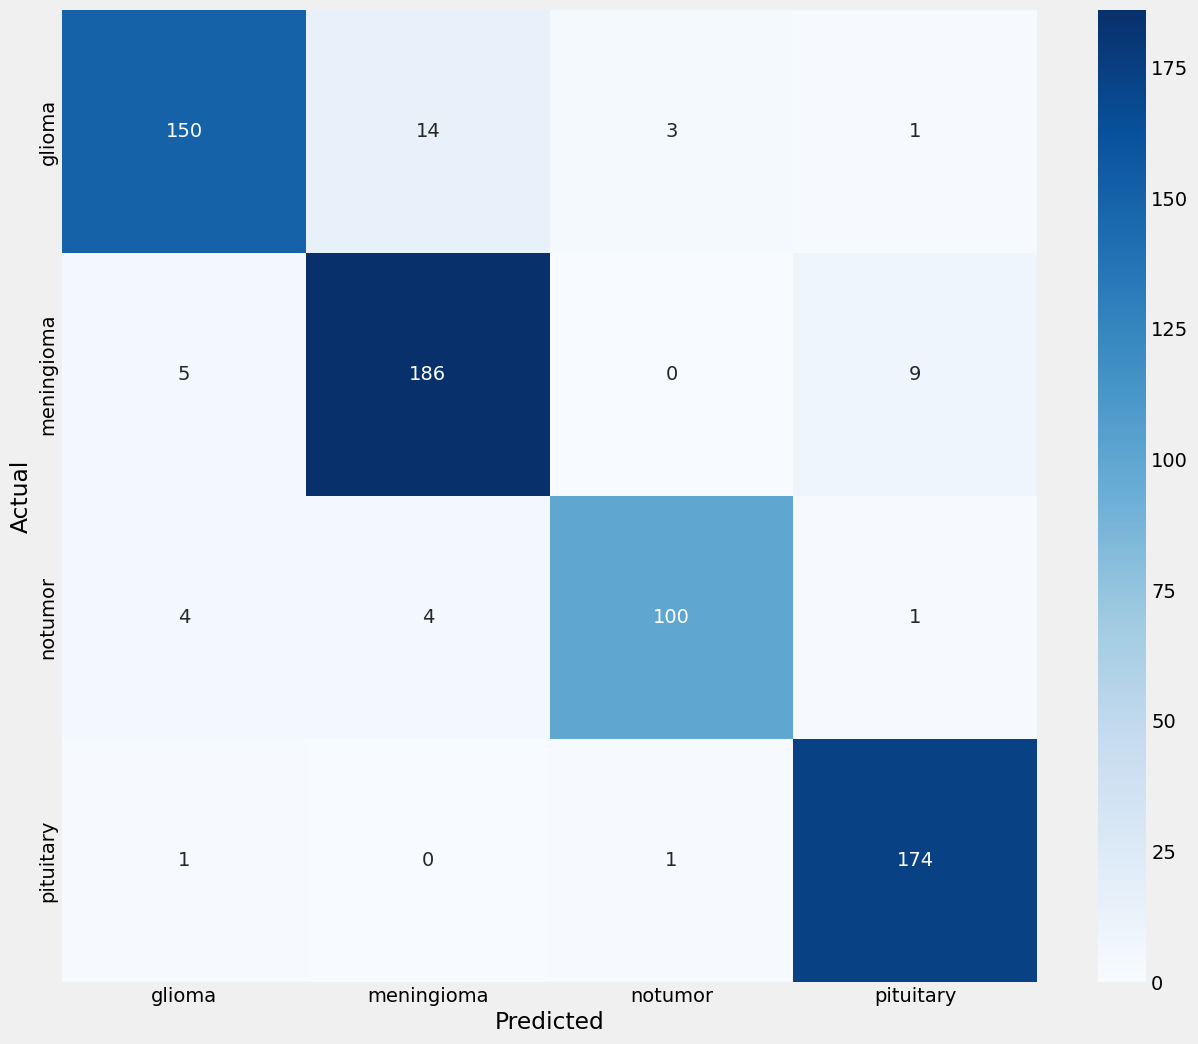

In [80]:
# Plotting the confusion matrix as a heatmap 
cm = confusion_matrix(y_test, y_pred_SVM_R) 

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM --------------------------------------------------------------------------

In [81]:
starting_time = time.time()   

# Train SVM classifier
svm_classifier = SVC(kernel='sigmoid') 
svm_classifier.fit(concatenated_features_Training, y_train)

# Evaluate SVM classifier
accuracy_Sigmoid = svm_classifier.score(concatenated_features_Testing, y_test)
print("Accuracy of Sigmoid:", accuracy_Sigmoid)  

ending_time = time.time()    

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of Sigmoid: 0.9218989280245024
Total runtime of model: 0.013088162740071614 Min.


In [82]:
# Predict the labels for the test set
y_pred_SVM_S = svm_classifier.predict(concatenated_features_Testing)

# Generate the classification report
report = classification_report(y_test, y_pred_SVM_S)

# Print the classification report
print("Classification Report for SVM_Sigmoid:")
print(report)

Classification Report for SVM_Sigmoid:
              precision    recall  f1-score   support

      glioma       0.93      0.88      0.90       168
  meningioma       0.89      0.91      0.90       200
     notumor       0.96      0.91      0.93       109
   pituitary       0.93      0.99      0.96       176

    accuracy                           0.92       653
   macro avg       0.93      0.92      0.92       653
weighted avg       0.92      0.92      0.92       653



In [ ]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[143, 15, 5, 5],
                             [5, 181, 1, 13],
                             [0, 10, 98, 1],
                             [0, 4, 2, 170]])

# Plot confusion matrix
plt.figure(figsize=(14, 12), dpi=500)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 14})

# Increase label font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14

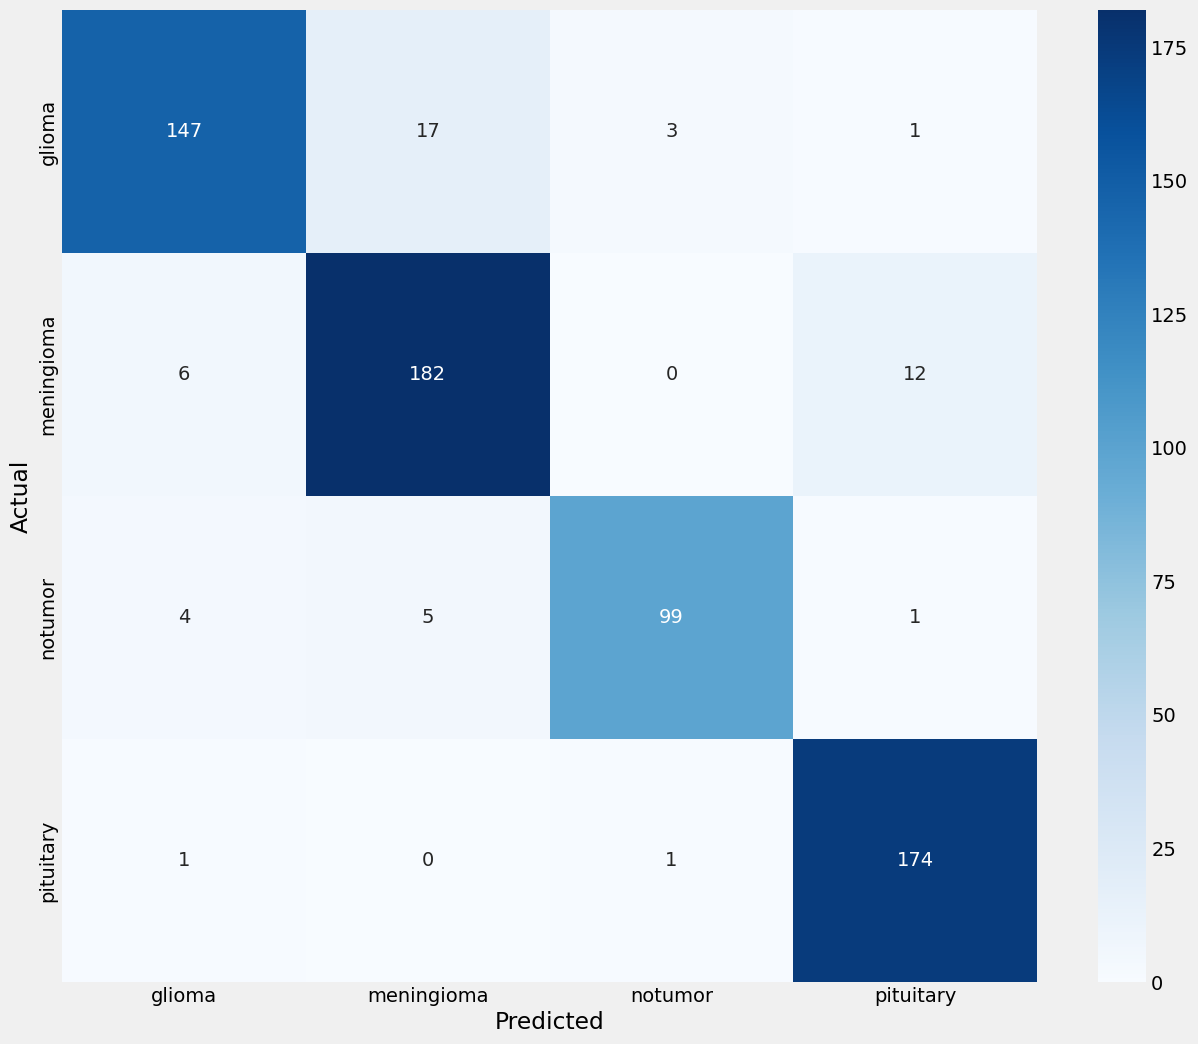

In [83]:
# Plotting the confusion matrix as a heatmap 
cm = confusion_matrix(y_test, y_pred_SVM_S) 

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()